<a href="https://colab.research.google.com/github/monikagulia1/STOCK-PRICE-PREDICTION/blob/main/STOCK_PRICE_MARKET_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# libraries


In [ ]:
import pandas as pd # for dataframes
import numpy as np #for numerical values
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
import plotly.graph_objs as go #for candelstick graph
from plotly.offline import iplot #FOR candelstick graph
from sklearn.preprocessing import MinMaxScaler
!pip install catboost
import os
import tempfile
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import ElasticNet, BayesianRidge
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from google.colab import drive
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
!pip install backtrader #for indicators
import backtrader as bt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
!pip install pandas-ta
import pandas_ta as ta
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=57d6623d120213362b55ea1cb7ed8780daf7397466448bfb8c772f321ede8e65
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


# connecting with google drive

In [ ]:
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


# data_exploration


In [ ]:
def data_exploration(df, columns_to_convert):
    """
    Perform data exploration on the given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to explore.
    columns_to_convert (list): List of column names to convert to float.

    Returns:
    None
    """


    for col in df.columns:
      df[col] = df[col].astype('float32')
    # Print the data shape
    print("Data Shape:", df.shape)


    # Print the data description
    print("Data Description:\n", df.describe())

    # Find all missing values in columns
    missing_values = df.isna().sum()
    print("Missing Values:\n", missing_values)

    # Find negative values in specified columns
    for i in columns_to_convert:
        negative_values = df[df[i].astype(float) < 0][i]
        print(f"Negative values in the column {i} are: {len(negative_values)}")
    print(df.head(1))
    # Find duplicate rows
    duplicates_rows = df.duplicated()
    print("Number of duplicate rows:", duplicates_rows.sum())

    # Print the first and last index
    first_index = df.index[0]
    last_index = df.index[-1]
    print("First Index:", first_index)
    print("Last Index:", last_index)

    # Find outliers in the 'Close' column
    data = df['Close'].astype(float)
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    outliers = []
    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)

    print(f"Number of outliers in 'Close': {len(outliers)}")
    print(f"Outliers in 'Close': {outliers}")

    # Find percentage of 'Close' values less than 20
    close_less_than_20 = df[df['Close'] < 20]
    print("Percentage of 'Close' values less than 20: {:.2f}%".format(len(close_less_than_20) / len(df) * 100))
    return df

# data_visualisation

In [ ]:
def price_date_volume(df):


  #graph 1 :-Price_Date_Volume chart


   # make secondary plot in yaxis

  fig = make_subplots(specs=[[{"secondary_y": True}]])

  # first plot
  fig.add_trace(go.Scatter(x=df.index,y=df['Close'],name='Price',mode="lines",line= dict(color='rgb(100,120,180)', width=2)),secondary_y=False  )


  # secondary plot
  fig.add_trace(go.Bar(x=df.index,y=df['Volume'],name='Volume',marker= dict(color='rgb(80,80,0)')),secondary_y=True )




  fig.update_yaxes(range=[0,30000000000],secondary_y=True,  showgrid=False)





  fig.update_layout(height=600, width=1000,
                  title_text="Time price chart in yearly time frame (price and trading volume)")



  # General setting
  fig.update_layout( xaxis_title='Date',
    xaxis=dict(
        showline=True , showgrid=False ,showticklabels=True ,
        linecolor= 'rgb(204,204,204)',
        linewidth=2, ticks='outside', tickfont=dict(
            family="Arial", size=12 , color='rgb(82,82,82)',
        ),
    ), yaxis_title='Price',
                  yaxis=dict(showline=True , showgrid=False ,showticklabels=True ,
        linecolor= 'rgb(204,204,204)',
        linewidth=2, ticks='outside', tickfont=dict(
            family="Arial", size=12 , color='rgb(82,82,82)',
        ),),
    autosize=False,
                  margin=dict(
                      autoexpand=False , l=100 , r= 20 , t= 110 ,) ,
     plot_bgcolor="white")



  fig.update_yaxes(title_text="Volume", secondary_y=True)



  fig.show()


In [ ]:
def data_visualization(df):
    """
    Perform data visualization on the given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to visualize.

    Returns:
    None
    """

    # Visualize moving averages (200) close
    ma50 = df.Close.rolling(50).mean()
    ma200 = df.Close.rolling(200).mean()
    plt.figure(figsize=(6, 3))
    plt.plot(df.Close)
    plt.plot(ma50, 'r')
    plt.plot(ma200, 'g')
    plt.title('Comparision of 50 Days And 200 Days simple Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.show()

    # Calculate Exponential Moving Average (EMWA)
    ema50 = df['Close'].ewm(span=50).mean()
    ema200 = df['Close'].ewm(span=200).mean()
    plt.figure(figsize=(6, 3))
    plt.plot(df.Close)
    plt.plot(ema50, 'r')
    plt.plot(ema200, 'g')
    plt.title('Comparision of 50 Days And 200 Days exponential Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.show()


    # Plot change in closing prices
    df['Change'] = df['Close'] - df['Close'].shift(1)
    df['Change'][0] = df['Open'][0] - df['Close'][0]
    plt.figure(figsize=(6, 3))
    plt.plot(df['Change'])
    plt.xlabel('Date')
    plt.ylabel('value of close changed form previous')
    plt.title('Change in Closing Prices')
    plt.show()

    #plot volume and price of stock
    price_date_volume(df)

# key indicator visualisation
1. buy and sell
2. macd
3. bband


In [ ]:
def buy_and_sell(df):
  df.index = pd.to_datetime(df.index)
  buy=[]
  sell=[]
  class GoldenCrossStrategy(bt.Strategy):
        """
        Implements a Golden Cross strategy:
        - Buy when the fast moving average crosses above the slow moving average (Golden Cross).
        - Sell when the fast moving average crosses below the slow moving average (Death Cross).
        """
        params = (('fast', 50), ('slow', 200))  # Define the periods for the moving averages

        def __init__(self):
            """
            Initialize the moving averages and the crossover indicator.
            """
            # Define the fast (50-day) moving average
            self.fast_ma = bt.indicators.SMA(self.data.close, period=self.p.fast)

            # Define the slow (200-day) moving average
            self.slow_ma = bt.indicators.SMA(self.data.close, period=self.p.slow)

            # Define the crossover indicator
            self.crossover = bt.indicators.CrossOver(self.fast_ma, self.slow_ma)

        def next(self):
            """
            Execute trading logic at each bar.
            """
            # Golden Cross: Buy when fast MA crosses above slow MA
            if self.crossover > 0:
                print(f"Golden Cross detected. Buying at {self.data.close[0]:.2f}")
                self.buy()  # Place a buy order
                buy.append(self.data.close[0])
            # Death Cross: Sell when fast MA crosses below slow MA
            elif self.crossover < 0:
                print(f"Death Cross detected. Selling at {self.data.close[0]:.2f}")
                self.sell()  # Place a sell order
                sell.append(self.data.close[0])


  # Initialize Cerebro engine
  cerebro = bt.Cerebro()

  # Add the strategy
  cerebro.addstrategy(GoldenCrossStrategy)

  # Add the data feed
  data = bt.feeds.PandasData(dataname=df)
  cerebro.adddata(data)

  # Run the backtest
  cerebro.run()
  return buy, sell # Return the buy and sell lists

# function 1 for plotting golden_cross
def plot_golden_cross(df,buy_indices, sell_indices, buy_close_prices, sell_close_prices):
  df.index = pd.to_datetime(df.index)
  # make secondary plot in yaxis

  fig = make_subplots(specs=[[{"secondary_y": True}]])
  # first plot
  fig.add_trace(go.Scatter(x=df.index,y=df['Close'],name='Price',mode="lines",line= dict(color='rgb(100,120,180)', width=2)),secondary_y=False  )


  # secondary plot
  # Use go.Scatter instead of go.scatter
  # Changed marker_symbol='^' to marker_symbol='triangle-up'
  fig.add_trace(go.Scatter(x=buy_indices, y=buy_close_prices,
            mode='markers', marker_symbol='triangle-up', marker_color='green',
            marker_size=10, name='Golden Cross Buy'), secondary_y=False)
  fig.add_trace(go.Scatter(x=sell_indices, y=sell_close_prices,
            mode='markers', marker_symbol='triangle-down', marker_color='red',
            marker_size=10, name='Golden Cross Sell'), secondary_y=False)




  fig.update_yaxes(range=[0,30000000000],secondary_y=True,  showgrid=False)





  fig.update_layout(height=600, width=1000,
                  title_text="Time price chart in yearly time frame (price and buy ,sell marker)")



  # General setting
  fig.update_layout( xaxis_title='Date',
    xaxis=dict(
        showline=True , showgrid=False ,showticklabels=True ,
        linecolor= 'rgb(204,204,204)',
        linewidth=2, ticks='outside', tickfont=dict(
            family="Arial", size=12 , color='rgb(82,82,82)',
        ),
    ), yaxis_title='Price',
                  yaxis=dict(showline=True , showgrid=False ,showticklabels=True ,
        linecolor= 'rgb(204,204,204)',
        linewidth=2, ticks='outside', tickfont=dict(
            family="Arial", size=12 , color='rgb(82,82,82)',
        ),),
    autosize=False,
                  margin=dict(
                      autoexpand=False , l=100 , r= 20 , t= 110 ,) ,
     plot_bgcolor="white")







  fig.show()

#function 2 for mcads:-
def MACD(df):
  df.index = pd.to_datetime(df.index)
  # Calculate MACD values using the pandas_ta library
  df.ta.macd(close='close', fast=12, slow=26, signal=9, append=True)
  # View result
  pd.set_option("display.max_columns", None)
  if 2023 in df.index.year:
    df1=df[(df.index.year == 2023) | (df.index.year == 2024)]
  else:
    df1 = df[df.index.year == 2024]

  # Construct a 2 x 1 Plotly figure
  fig = make_subplots(rows=2, cols=1)


  # price Line
  fig.append_trace(
    go.Scatter(
        x=df1.index,
        y=df1['Open'],
        line=dict(color='rgb(0,100,200)', width=1),
        name='Open',
        # showlegend=False,
        legendgroup='1',
    ), row=1, col=1
  )


  # Candlestick chart for pricing
  fig.append_trace(
    go.Candlestick(
        x=df1.index,
        open=df1['Open'],
        high=df1['High'],
        low=df1['Low'],
        close=df1['Close'],
        increasing_line_color='rgb(0,177,64)',
        decreasing_line_color='rgb(255,0,0)',
        showlegend=False
    ), row=1, col=1
  )


  # Fast Signal (%k)
  fig.append_trace(
    go.Scatter(
        x=df1.index,
        y=df1['MACD_12_26_9'],
        line=dict(color='rgb(0,0,0)', width=1),
        name='MACD',
        # showlegend=False,
        legendgroup='2',
    ), row=2, col=1
  )


  # Slow signal (%d)
  fig.append_trace(
    go.Scatter(
        x=df1.index,
        y=df1['MACDs_12_26_9'],
        line=dict(color='rgb(0,181,226)', width=1),
        # showlegend=False,
        legendgroup='2',
        name='Signal'
    ), row=2, col=1
  )


  # Colorize the histogram values
  colors = np.where(df1['MACDh_12_26_9'] < 0, 'rgb(0,177,64)', 'rgb(255,0,0)')


  # Plot the histogram
  fig.append_trace(
    go.Bar(
        x=df1.index,
        y=df1['MACDh_12_26_9'],
        name='Histogram',
        marker_color=colors,
    ), row=2, col=1
  )


  # Make it pretty
  layout = go.Layout(
    plot_bgcolor='rgb(255,255,255)',
    # Font Families
    font_family='Arial',
    font_color='rgb(82,82,82)',
    font_size=12,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
  )


  # Update options and show plot
  fig.update_layout(layout)


  fig.show()

# function for bbands

def BBANDS(df):
  df.index = pd.to_datetime(df.index)
  if 2023 in df.index.year:
    df1=df[(df.index.year == 2023) | (df.index.year == 2024)]
  else:
    df1 = df[df.index.year == 2024]
  df1.ta.bbands(length=20, append=True)

  # Plot Bollinger Bands
  fig = go.Figure()

  # Add candlestick trace
  fig.add_trace(go.Candlestick(x=df1.index,
                open=df1['Open'],
                high=df1['High'],
                low=df1['Low'],
                close=df1['Close'], name='Candlesticks'))

  # Add Bollinger Bands traces
  fig.add_trace(go.Scatter(x=df1.index, y=df1['BBU_20_2.0'], mode='lines', line=dict(color='red'), name='Upper Bollinger Band'))
  fig.add_trace(go.Scatter(x=df1.index, y=df1['BBM_20_2.0'], mode='lines', line=dict(color='black'), name='Middle Bollinger Band'))
  fig.add_trace(go.Scatter(x=df1.index, y=df1['BBL_20_2.0'], mode='lines', line=dict(color='blue'), name='Lower Bollinger Band'))


  fig.update_xaxes(rangeslider_visible=True, rangeselector=dict(
    buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")])))
  fig.update_layout(title='Bollinger Bands Visualization With Candlesticks', xaxis_title='Date', yaxis_title='Price')

  layout = go.Layout(
    plot_bgcolor='rgb(255,255,255)',
    # Font Families
    font_family='Arial',
    font_color='rgb(82,82,82)',
    font_size=12,
    xaxis=dict(
        rangeslider=dict(
            visible=False )))


  # Update options and show plot
  fig.update_layout(layout)
  fig.show()


In [ ]:
def keyindicators(df):
  buy,sell=buy_and_sell(df)

  buy_indices = df.index[df['Close'].isin(buy)]
  sell_indices = df.index[df['Close'].isin(sell)]
  # Get the 'Close' values for the buy indices using boolean indexing and .values
  buy_close_prices = df['Close'][df['Close'].isin(buy)].values
  # Get the 'Close' values for the sell indices using boolean indexing and .values
  sell_close_prices = df['Close'][df['Close'].isin(sell)].values
  print(f"buy date: {buy_indices}")
  print(f"sell date: {sell_indices}")


  # Plot the golden cross
  plot_golden_cross(df,buy_indices, sell_indices, buy_close_prices, sell_close_prices)
  # Plot the MACD
  MACD(df)
  # plot the bbands
  BBANDS(df)


# data_preprocessing

In [ ]:
def preprocess_data(df, test_size=0.3, lookback=20):
    column=df.columns

    # Convert relevant columns to float32, excluding the 'Date' column
    tesla_data = df[column].astype("float32")


    # Split data into training and testing sets
    def split_data(dataframe, test_size):
        pos = int(round(len(dataframe) * (1 - test_size)))
        train = dataframe[:pos]
        test = dataframe[pos:]
        return train, test, pos

    train, test, pos = split_data(tesla_data, test_size)

    # Scale data using MinMaxScaler
    scaler_train = MinMaxScaler(feature_range=(0, 1))
    train = scaler_train.fit_transform(train)
    scaler_test = MinMaxScaler(feature_range=(0, 1))
    test = scaler_test.fit_transform(test)

    # Create features and labels
    def create_features(data, lookback):
        X, Y = [], []
        for i in range(lookback, len(data)):
            X.append(data[i - lookback:i, 0])
            Y.append(data[i, 0])
        return np.array(X), np.array(Y)

    X_train, y_train = create_features(train, lookback)
    X_test, y_test = create_features(test, lookback)

    return X_train, y_train, X_test, y_test

# train and evaluate models

In [ ]:
# Temporary directory for CatBoost
temp_dir = tempfile.mkdtemp()
os.environ['CATBOOST_WORK_DIR'] = temp_dir
model_params = {
        'KNN': {
            'model': KNeighborsRegressor(),
            'params': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
        },
        'CatBoost': {
            'model': CatBoostRegressor(verbose=0, train_dir=temp_dir),
            'params': {'depth': [6, 8, 10], 'learning_rate': [0.01, 0.1, 0.3], 'iterations': [100, 200]}
        },
        'ElasticNet': {
            'model': ElasticNet(),
            'params': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}
        },
        'Bayesian Ridge': {
            'model': BayesianRidge(),
            'params': {'alpha_1': [1e-6, 1e-5, 1e-4], 'alpha_2': [1e-6, 1e-5, 1e-4]}
        },
        'AdaBoost': {
            'model': AdaBoostRegressor(),
            'params': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]}
        },
        'Ridge': {
            'model': Ridge(),
            'params': {'alpha': [0.1, 1.0, 10.0]}
        },
        'Extra Trees': {
            'model': ExtraTreesRegressor(),
            'params': {'n_estimators': [50, 100, 200], 'max_features': ['sqrt', 'log2']}
        },
        'LinearRegression': {
            'model': LinearRegression(),
            'params': {}
        },
        'DecisionTree': {
            'model': DecisionTreeRegressor(),
            'params': {'max_depth': [None, 10, 20]}
        },
        'SVR': {
            'model': SVR(),
            'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
        },
        'Random Forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100, 200],
                'max_depth': [10, 20, 30, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        }
        }

# LSTM Model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def train_and_evaluate_models(X_train, X_test, y_train, y_test):

    # Reshape input data
    X_train_2d = X_train.reshape(X_train.shape[0], -1)
    X_test_2d = X_test.reshape(X_test.shape[0], -1)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Store results
    metrics_results = []
    predictions = {}

    # Train LSTM
    print("Training LSTM...")
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    lstm_model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
    lstm_model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)
    y_pred_lstm = lstm_model.predict(X_test).flatten()
    metrics_results.append(('LSTM', mean_absolute_error(y_test, y_pred_lstm),
                            np.sqrt(mean_squared_error(y_test, y_pred_lstm)),
                            r2_score(y_test, y_pred_lstm)))
    predictions['LSTM'] = y_pred_lstm

    # Train and evaluate other models
    for model_name, config in model_params.items():
        print(f"Tuning hyperparameters for {model_name}...")
        try:  # Try-except block to handle potential errors
            random_search = RandomizedSearchCV(estimator=config['model'], param_distributions=config['params'],
                                               n_iter=3, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
            random_search.fit(X_train_2d, y_train.ravel())

            # Best model and predictions
            best_model = random_search.best_estimator_
            y_pred = best_model.predict(X_test_2d)
            predictions[model_name] = y_pred

            # Calculate metrics
            mae = mean_absolute_error(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            r2 = r2_score(y_test, y_pred)
            metrics_results.append((model_name, mae, rmse, r2))

            print(f"Best parameters for {model_name}: {random_search.best_params_}")
            print(f"Metrics - MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
        except Exception as e:
            print(f"Error training {model_name}: {e}")  # Print error message

    # Display metrics
    print("\nModel Evaluation Metrics:")
    print(f"{'Model':<20} {'MAE':<10} {'RMSE':<10} {'R²':<10}")
    for result in metrics_results:
        print(f"{result[0]:<20} {result[1]:<10.4f} {result[2]:<10.4f} {result[3]:<10.4f}")

    return metrics_results, predictions



# TIME SERIES MODELS WITH ARIMA


In [ ]:


# import the adfuller function from statsmodel
# package to perform ADF test
from statsmodels.tsa.stattools import adfuller

def seasonality_test(df):
  df.index = pd.to_datetime(df.index)
  # ETS Decomposition
  result = seasonal_decompose(df['Close'],
                            model ='multiplicative',period=365)

  # ETS plot
  result.plot()

def autocorrelation_test(df):
  # Plot the autocorrelation for stock price data with  significance level
  plot_acf(df['Close'], alpha =0.05)
  plt.show()
  #Code for Durbin Watson test
  X =np.arange(len(df[['Close']]))
  Y = np.asarray(df[['Close']])
  X = sm.add_constant(X)

  # Fit the ordinary least square method.
  ols_res = OLS(Y,X).fit()
  # apply durbin watson statistic on the ols residual
  durbin_watson(ols_res.resid)
  print(f"Durbin Watson Statistic: {durbin_watson(ols_res.resid)}")

def stationarity_test(df):
  # result of adfuller function is stored in a res variable
  values=df['Close']
  values = values.dropna()
  res = adfuller(values)

  # Printing the statistical result of the adfuller test
  print('Augmneted Dickey_fuller Statistic: %f' % res[0])
  print('p-value: %f' % res[1])

  # printing the critical values at different alpha levels.
  print('critical values at different levels:')
  for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

  # Plot ACF and PACF
  plot_acf(df['Close'], lags=40)
  plot_pacf(df['Close'], lags=40)
  plt.show()


# prediction vs actual


In [ ]:
import matplotlib.pyplot as plt

def plot_predictions_vs_actual(y_test, y_preds):
    """
    Plots predictions vs actual values for multiple models.

    Args:
        y_test (array-like): True values.
        y_preds (dict): Dictionary where keys are model names and values are prediction arrays.
    """
    num_models = len(y_preds)  # Get the number of models
    rows = (num_models + 1) // 2  # Calculate rows for subplots (2 columns)
    fig, axes = plt.subplots(rows, 2, figsize=(15, rows * 4))  # Create subplots
    axes = axes.flatten()  # Flatten to 1D array for easy indexing

    # Plot each model's predictions
    for i, (model_name, y_pred) in enumerate(y_preds.items()):
        ax = axes[i]
        ax.scatter(range(len(y_test)), y_test, label='Actual', color='blue', alpha=0.6)
        ax.plot(range(len(y_test)), y_pred, label='Predicted', color='red', alpha=0.8)
        ax.set_title(f'{model_name} Predictions vs. Actual')
        ax.set_xlabel('Sample Index')
        ax.set_ylabel('Value')
        ax.legend()
        ax.grid()

    # Remove unused subplots
    for i in range(len(y_preds), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# stock1:- '/gdrive/MyDrive/TSLA.csv'


Processing file: /gdrive/MyDrive/TSLA.csv
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
Data Shape: (3515, 6)
Data Description:
               Open         High          Low        Close    Adj Close  \
count  3515.000000  3515.000000  3515.000000  3515.000000  3515.000000   
mean     74.235924    75.848640    72.498314    74.208328    74.208328   
std     102.004082   104.248528    99.531822   101.917740   101.917740   
min       1.076000     1.108667     0.998667     1.053333     1.053333   
25%      11.373333    11.633333    11.065334    11.354333    11.354333   
50%      17.343332    17.586666    17.001333    17.344667    17.344667   
75%     149.381668   152.398331   145.650673   149.186668   149.186668   
max     411.470001   414.496674   405.666656   409.970001   409.970001   

            Volume  
count     

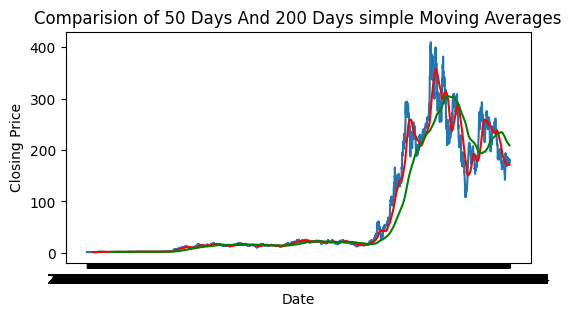

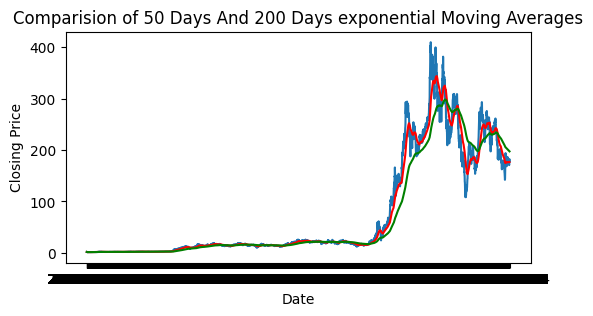

<ipython-input-6-d368a4850d2c>:39: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-6-d368a4850d2c>:39: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documenta

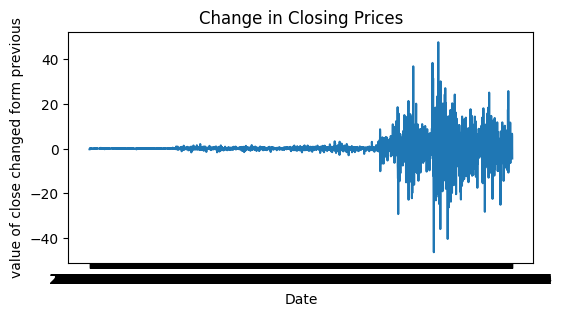

Death Cross detected. Selling at 1.58
Golden Cross detected. Buying at 2.16
Death Cross detected. Selling at 2.07
Golden Cross detected. Buying at 2.30
Death Cross detected. Selling at 13.48
Golden Cross detected. Buying at 17.07
Death Cross detected. Selling at 14.29
Golden Cross detected. Buying at 16.12
Death Cross detected. Selling at 14.40
Golden Cross detected. Buying at 14.70
Death Cross detected. Selling at 13.90
Golden Cross detected. Buying at 16.80
Death Cross detected. Selling at 22.74
Golden Cross detected. Buying at 23.30
Death Cross detected. Selling at 18.63
Golden Cross detected. Buying at 23.90
Death Cross detected. Selling at 21.33
Golden Cross detected. Buying at 21.15
Death Cross detected. Selling at 218.98
Golden Cross detected. Buying at 243.64
Death Cross detected. Selling at 235.91
Golden Cross detected. Buying at 256.60
Death Cross detected. Selling at 188.86
buy date: DatetimeIndex(['2011-11-03', '2012-04-10', '2012-05-03', '2012-12-20',
               '2013-

<ipython-input-7-8a1bee0a3bc4>:231: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-8a1bee0a3bc4>:231: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-8a1bee0a3bc4>:231: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-8a1be

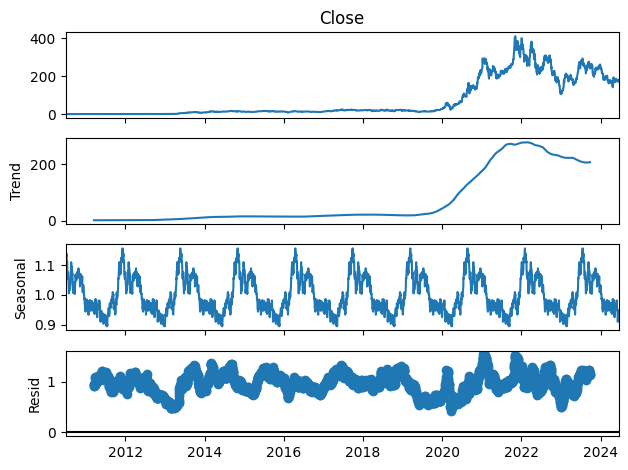

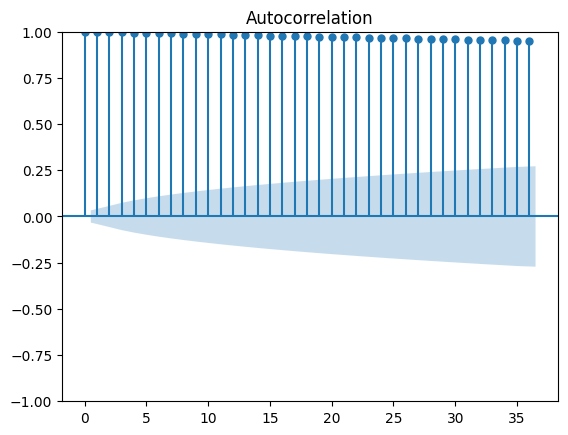

Durbin Watson Statistic: 0.00546822593742093
Augmneted Dickey_fuller Statistic: -1.300495
p-value: 0.628946
critical values at different levels:
	1%: -3.432
	5%: -2.862
	10%: -2.567


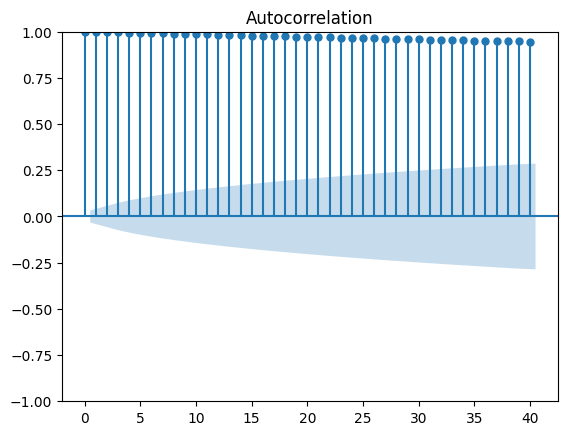

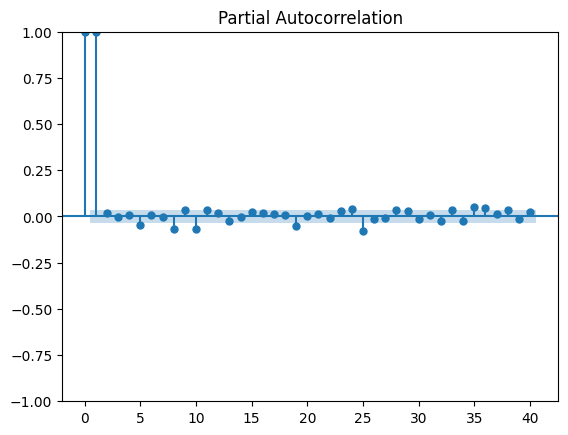

Training LSTM...
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0152 - mae: 0.0917 - val_loss: 0.0043 - val_mae: 0.0361
Epoch 2/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 8.5221e-04 - mae: 0.0205 - val_loss: 0.0037 - val_mae: 0.0347
Epoch 3/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 7.5905e-04 - mae: 0.0188 - val_loss: 0.0036 - val_mae: 0.0339
Epoch 4/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.4623e-04 - mae: 0.0187 - val_loss: 0.0040 - val_mae: 0.0393
Epoch 5/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.3790e-04 - mae: 0.0185 - val_loss: 0.0034 - val_mae: 0.0331
Epoch 6/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.4268e-04 - mae: 0.0177 - val_loss: 0.0033 - val_mae: 0.0330
Epoch 7/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.3607e-04 - mae: 0.0173 - val_loss: 0.0035 - val_mae: 0.0359
Epoch 8/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.8052e-04 - mae: 0.0169 - val_loss: 0.0033 - val_mae: 0.0335
Epoch 9/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/s

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning:

The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.



Best parameters for DecisionTree: {'max_depth': 10}
Metrics - MAE: 0.0546, RMSE: 0.0906, R²: 0.7617
Tuning hyperparameters for SVR...
Best parameters for SVR: {'kernel': 'linear', 'C': 0.1}
Metrics - MAE: 0.0359, RMSE: 0.0465, R²: 0.9372
Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 30}
Metrics - MAE: 0.0275, RMSE: 0.0369, R²: 0.9606

Model Evaluation Metrics:
Model                MAE        RMSE       R²        
LSTM                 0.0423     0.0560     0.9092    
KNN                  0.0680     0.0876     0.7774    
CatBoost             0.0481     0.0616     0.8901    
ElasticNet           0.3046     0.3462     -2.4778   
Bayesian Ridge       0.0184     0.0254     0.9812    
AdaBoost             0.0336     0.0473     0.9351    
Ridge                0.0183     0.0252     0.9815    
Extra Trees          0.0588     0.0735     0.8432    
LinearRegression     0.0185     0.02

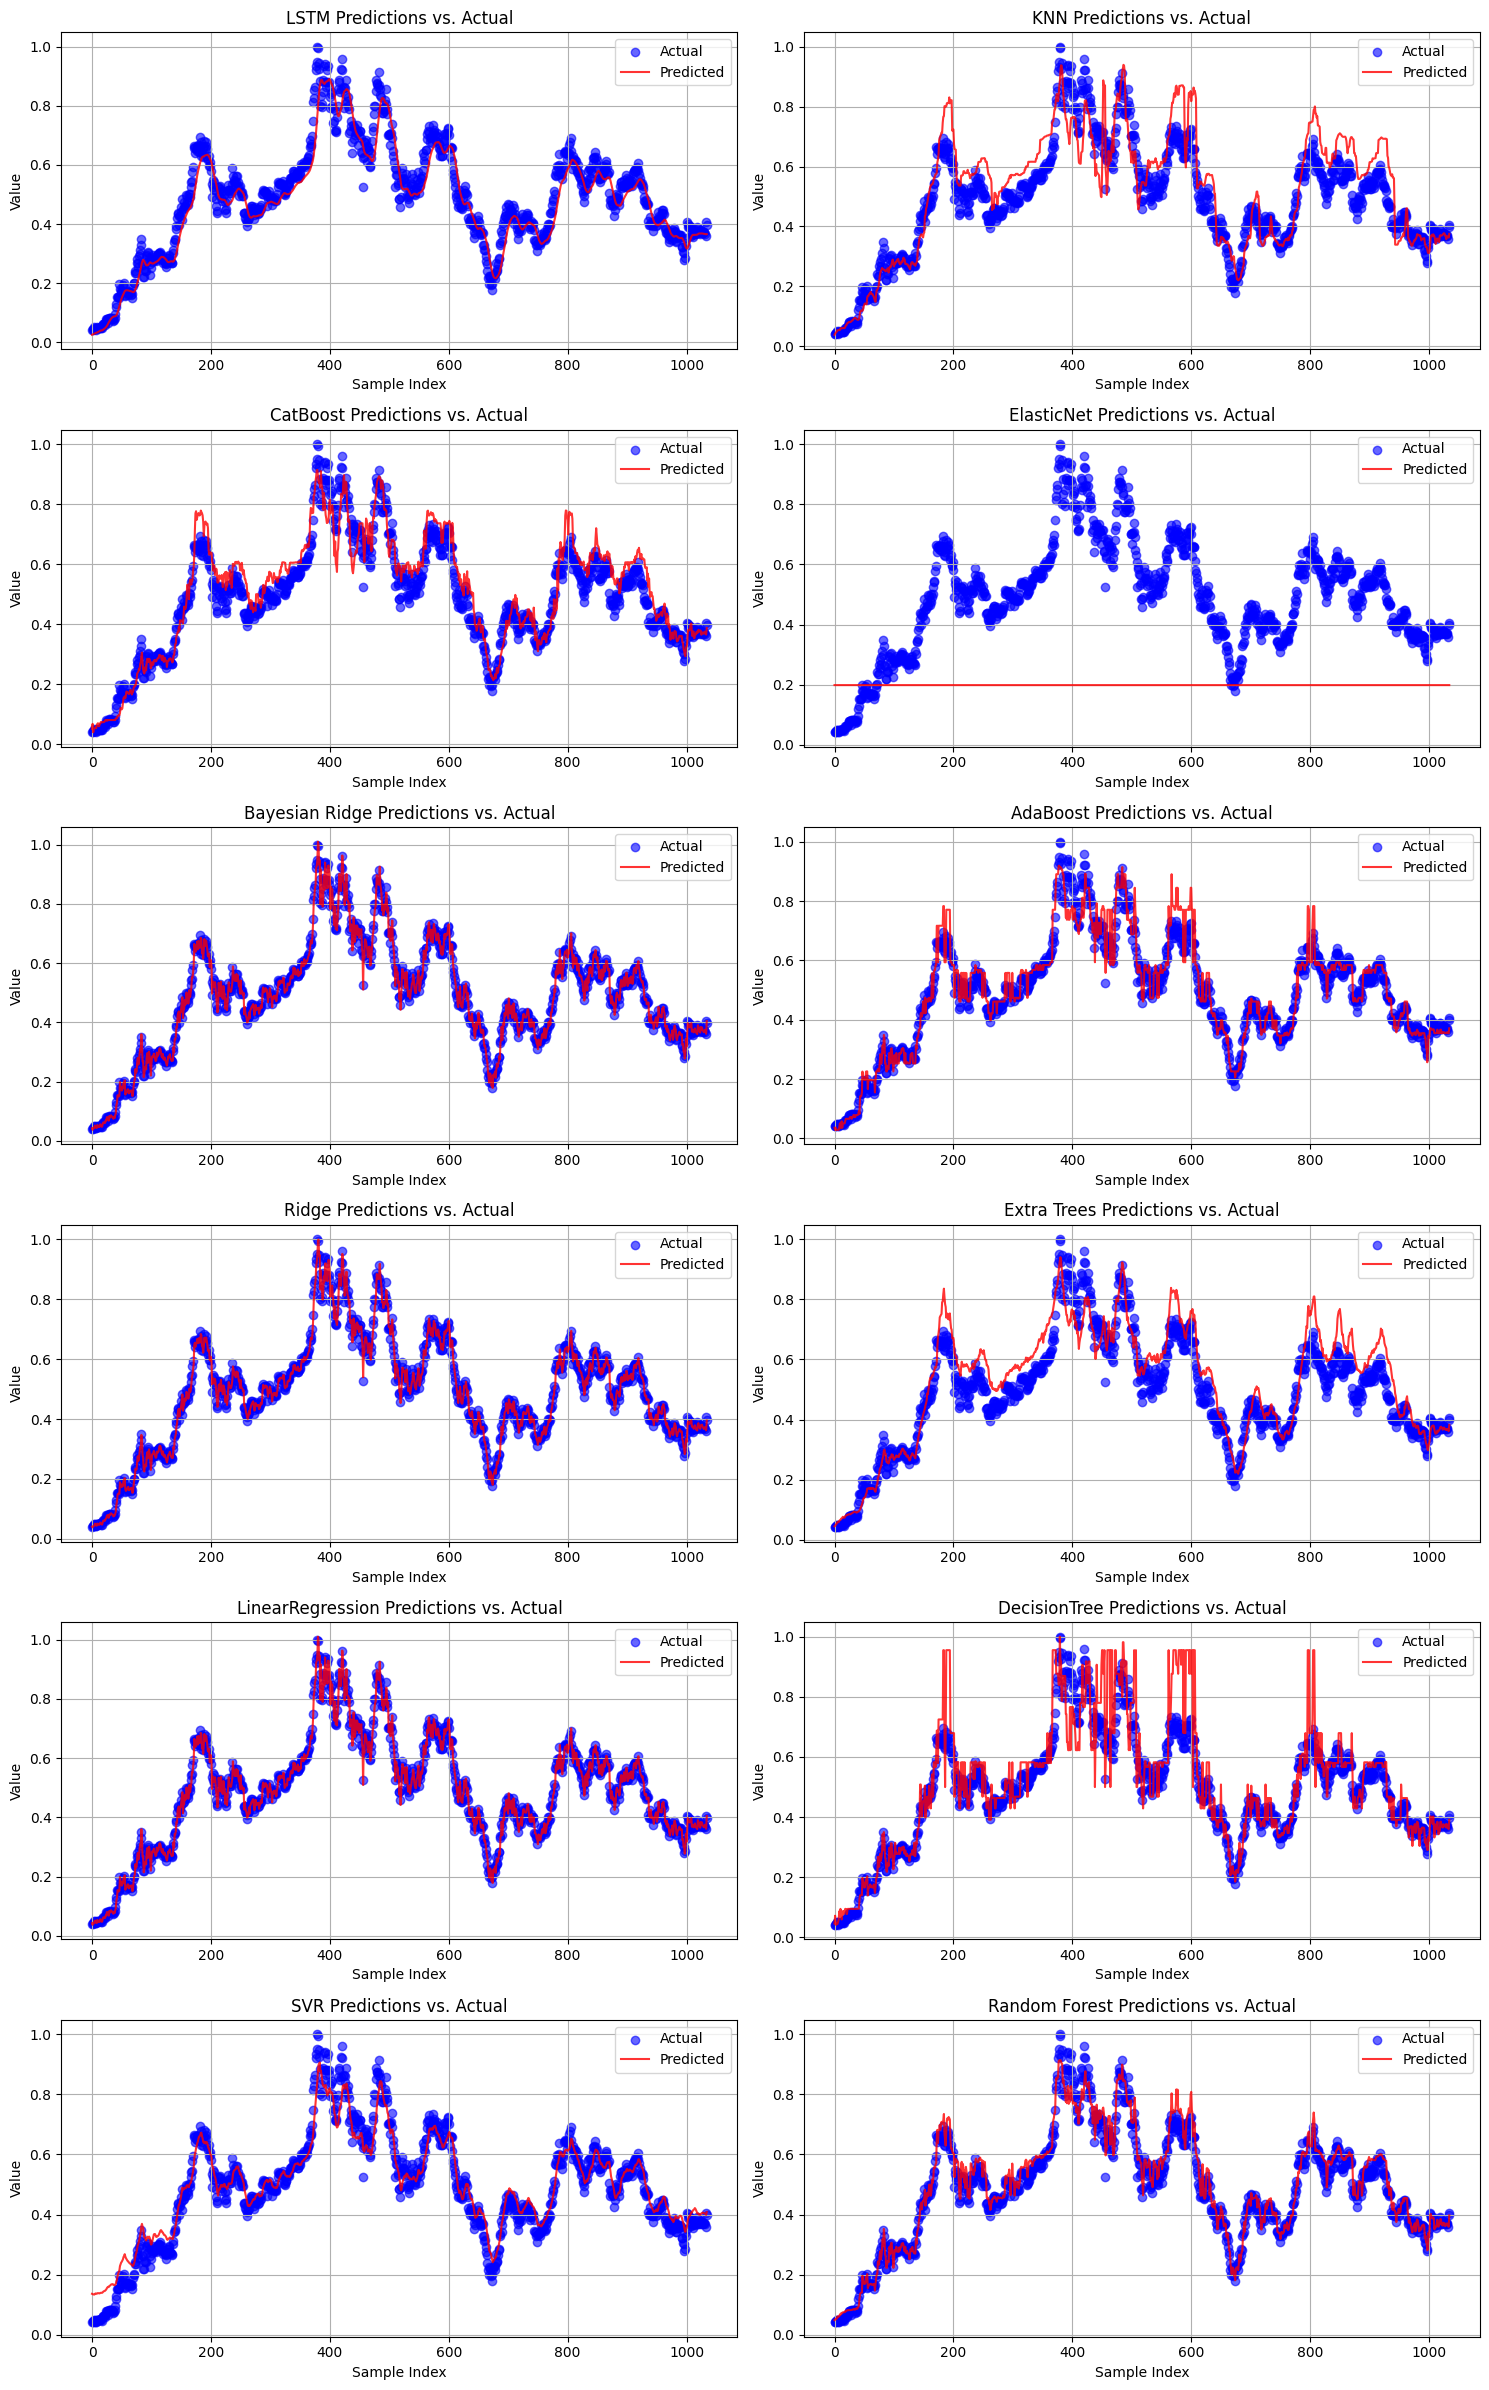

In [ ]:
# Define file paths
file_paths = [
    '/gdrive/MyDrive/TSLA.csv',
    '/gdrive/MyDrive/APPLE.csv',
    '/gdrive/MyDrive/Netflix.csv',
    '/gdrive/MyDrive/STARBUCKS.csv',
    '/gdrive/MyDrive/cisco.csv'

]


print(f"Processing file: {file_paths[0]}")
df = pd.read_csv(file_paths[0])
# Convert 'Date' column to datetime format
df['Date']=pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')

#remove '$' from column
for col in df.columns:
  if col in df.columns:
    if df[col].dtype == 'object':
      if '$' in str(df[col].iloc[0]):
        try:
          df[col] = df[col].astype(str).str.replace('$', '', regex=False)
          df[col] = pd.to_numeric(df[col], errors='coerce') #Convert to numeric, handling potential errors
        except Exception as e:
          print(f"Error converting column '{col}': {e}")



if 'Close/Last' in df.columns:
  df = df.rename(columns={'Close/Last': 'Close'})

if "TESLA" in file_paths[0].upper():
  df=df.drop('Adj Close',axis=1)


columns_to_convert=['Open', 'High', 'Low', 'Close','Volume']

df.index=df['Date']
df=df.drop('Date',axis=1)
print(df.head(1))
# Data Exploration
df = data_exploration(df, columns_to_convert)
# Data Visualisation
data_visualization(df)
#key indicator visualisation
keyindicators(df)

# Data Preprocessing
X_train, y_train, X_test, y_test = preprocess_data(df)


#check stationarity,seasonality and autocorrelation

seasonality_test(df)
autocorrelation_test(df)
stationarity_test(df)

# Model Training and Evaluation
metrics_results, predictions = train_and_evaluate_models(X_train, X_test, y_train, y_test)

#Prediction vs Actual plot
plot_predictions_vs_actual(y_test, predictions)

# stock 2-    '/gdrive/MyDrive/APPLE.csv'

Processing file: /gdrive/MyDrive/APPLE.csv
             Close    Volume    Open    High     Low
Date                                                
2024-12-09  246.75  44649230  241.83  247.24  241.75
Data Shape: (2516, 5)
Data Description:
              Close       Volume         Open         High          Low
count  2516.000000       2516.0  2516.000000  2516.000000  2516.000000
mean     95.028358  117615760.0    94.944908    95.956314    94.001762
std      64.344170   68271720.0    64.271568    64.939445    63.662266
min      22.584999   24048340.0    22.500000    22.917500    22.367500
25%      36.972499   71553276.0    36.882499    37.190001    36.497500
50%      65.467499  100737380.0    64.976250    65.811249    64.548748
75%     151.339996  143121880.0   151.190002   153.283745   149.926250
max     246.750000  647529984.0   243.990005   247.240005   242.130005
Missing Values:
 Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64
Negative values in the colum

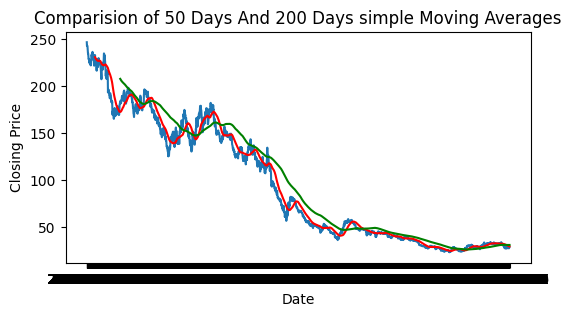

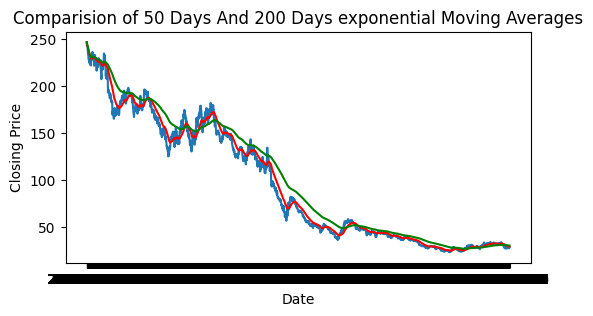

<ipython-input-6-d368a4850d2c>:39: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-6-d368a4850d2c>:39: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documenta

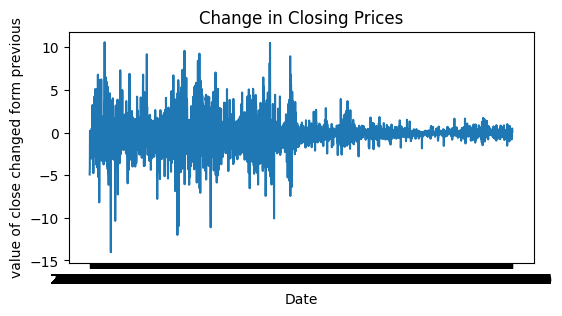

Golden Cross detected. Buying at 191.94
Death Cross detected. Selling at 173.75
Golden Cross detected. Buying at 174.55
Death Cross detected. Selling at 149.64
Golden Cross detected. Buying at 165.07
Death Cross detected. Selling at 143.76
Golden Cross detected. Buying at 55.30
Death Cross detected. Selling at 47.15
Golden Cross detected. Buying at 29.76
Death Cross detected. Selling at 27.97
buy date: DatetimeIndex(['2023-07-21', '2022-08-17', '2022-04-18', '2018-10-17',
               '2015-12-04'],
              dtype='datetime64[ns]', name='Date', freq=None)
sell date: DatetimeIndex(['2023-10-02', '2023-05-11', '2022-05-27', '2021-10-14',
               '2018-05-25', '2015-01-08'],
              dtype='datetime64[ns]', name='Date', freq=None)


<ipython-input-7-8a1bee0a3bc4>:231: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-8a1bee0a3bc4>:231: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-8a1bee0a3bc4>:231: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-8a1be

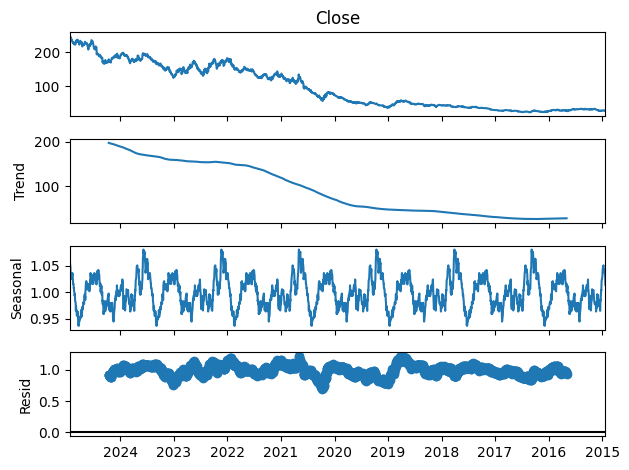

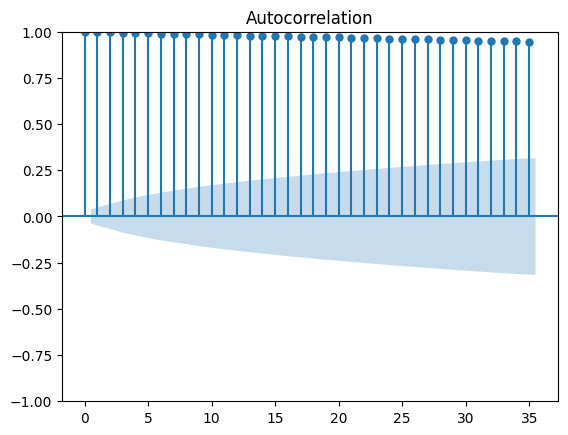

Durbin Watson Statistic: 0.008983712023352712
Augmneted Dickey_fuller Statistic: -1.911015
p-value: 0.326897
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567


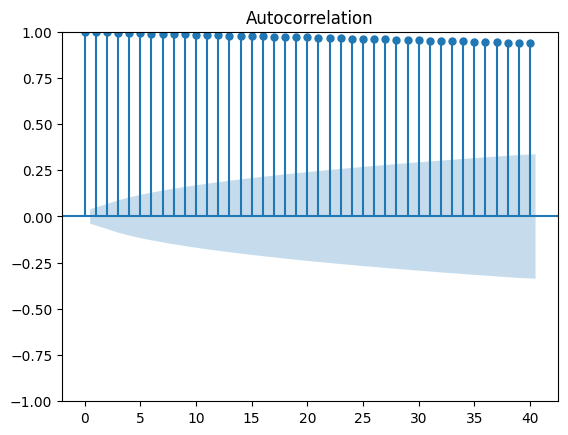

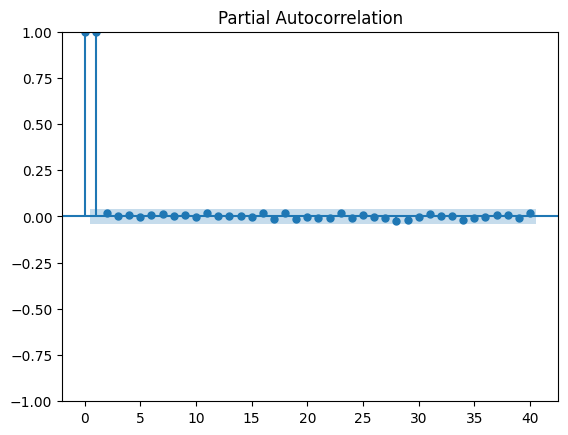

Training LSTM...
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1682 - mae: 0.3364 - val_loss: 0.0255 - val_mae: 0.1589
Epoch 2/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0115 - mae: 0.0876 - val_loss: 0.0089 - val_mae: 0.0934
Epoch 3/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0084 - mae: 0.0719 - val_loss: 0.0010 - val_mae: 0.0292
Epoch 4/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0062 - mae: 0.0581 - val_loss: 3.2471e-04 - val_mae: 0.0151
Epoch 5/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0071 - mae: 0.0632 - val_loss: 5.2816e-04 - val_mae: 0.0198
Epoch 6/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0069 - mae: 0.0616 - val_loss: 4.2609e-04 - val_mae: 0.0175
Epoch 7/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0053 - mae: 0.0546 - val_loss: 4.6544e-04 - val_mae: 0.0183
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Tuning hyperparameters for KNN...
Best parameters for KNN: {'weights': 'uniform', 'n_neighbors': 3}
Metrics - MAE: 0.0351, RMSE: 0.0457,

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning:

The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.



Best parameters for DecisionTree: {'max_depth': None}
Metrics - MAE: 0.0261, RMSE: 0.0350, R²: 0.9761
Tuning hyperparameters for SVR...
Best parameters for SVR: {'kernel': 'linear', 'C': 0.1}
Metrics - MAE: 0.0442, RMSE: 0.0543, R²: 0.9424
Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Metrics - MAE: 0.0207, RMSE: 0.0287, R²: 0.9839

Model Evaluation Metrics:
Model                MAE        RMSE       R²        
LSTM                 0.0432     0.0562     0.9383    
KNN                  0.0351     0.0457     0.9593    
CatBoost             0.0280     0.0365     0.9740    
ElasticNet           0.1343     0.1595     0.5040    
Bayesian Ridge       0.0144     0.0201     0.9921    
AdaBoost             0.0239     0.0321     0.9799    
Ridge                0.0153     0.0210     0.9914    
Extra Trees          0.0290     0.0379     0.9720    
LinearRegression     0.0144     0.

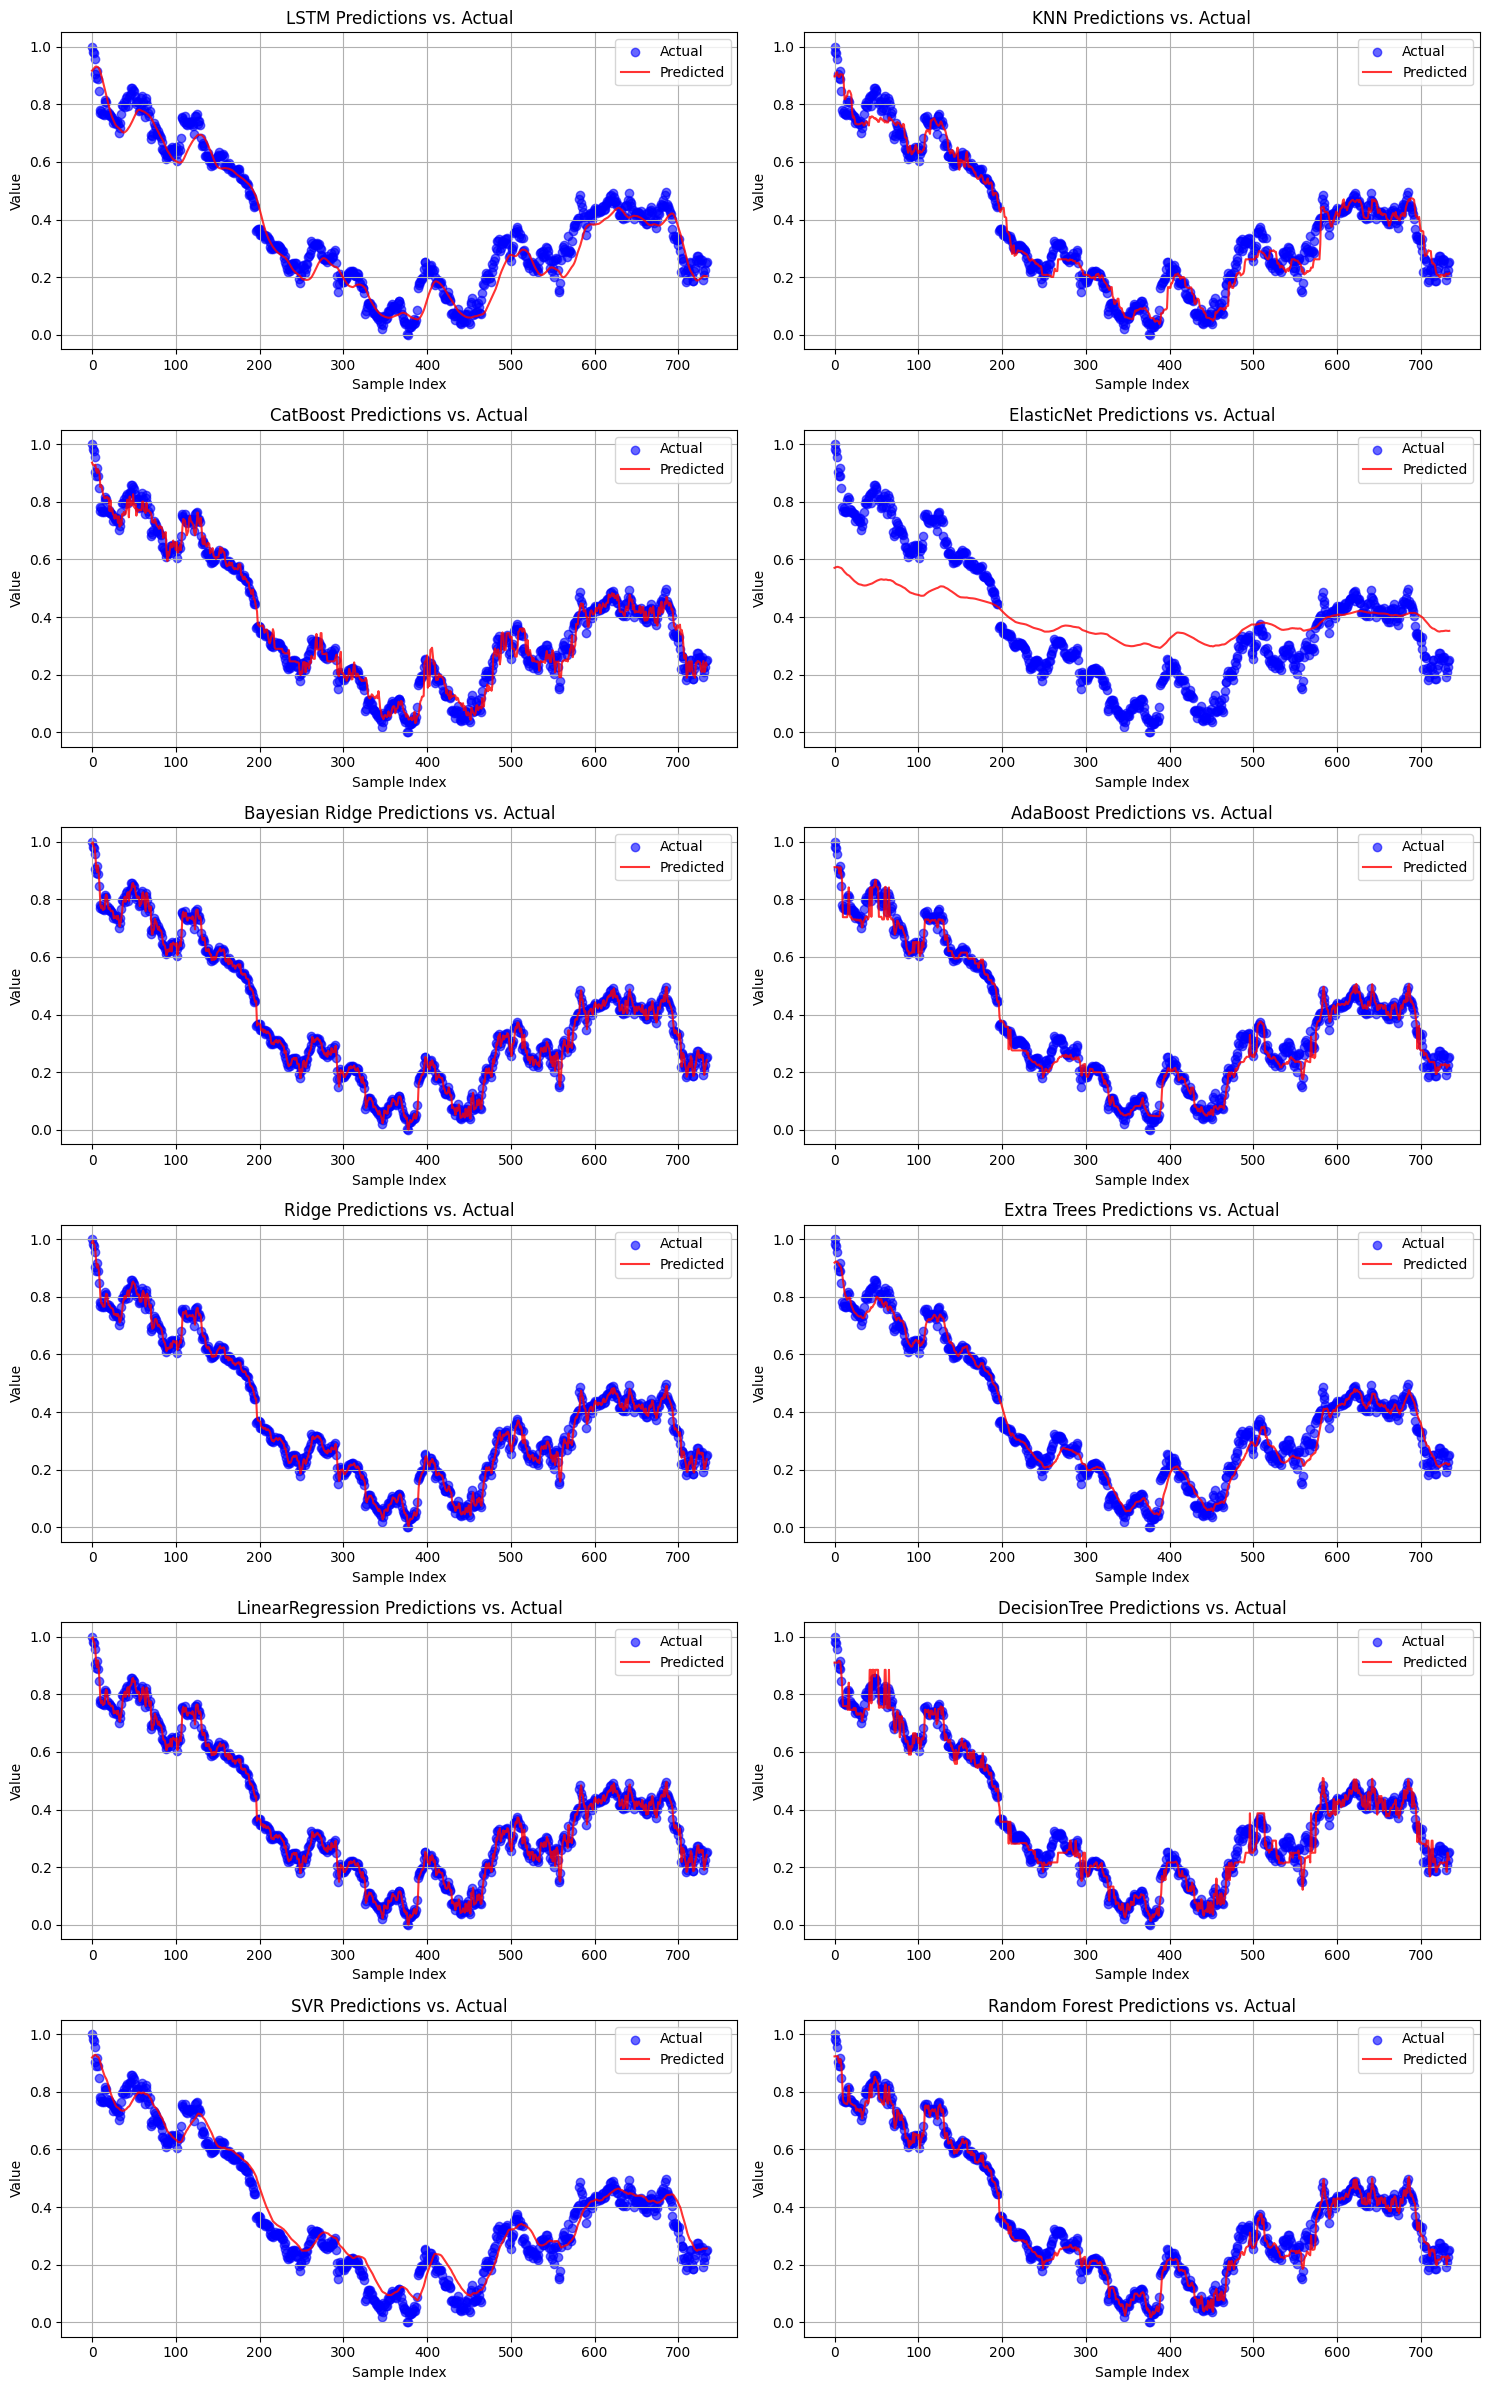

In [ ]:
print(f"Processing file: {file_paths[1]}")
df = pd.read_csv(file_paths[1])
# Convert 'Date' column to datetime format
df['Date']=pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')

#remove '$' from column
for col in df.columns:
  if col in df.columns:
    if df[col].dtype == 'object':
      if '$' in str(df[col].iloc[0]):
        try:
          df[col] = df[col].astype(str).str.replace('$', '', regex=False)
          df[col] = pd.to_numeric(df[col], errors='coerce') #Convert to numeric, handling potential errors
        except Exception as e:
          print(f"Error converting column '{col}': {e}")



if 'Close/Last' in df.columns:
  df = df.rename(columns={'Close/Last': 'Close'})

if "TESLA" in file_paths[1].upper():
  df=df.drop('Adj Close',axis=1)


columns_to_convert=['Open', 'High', 'Low', 'Close','Volume']

df.index=df['Date']
df=df.drop('Date',axis=1)
print(df.head(1))
# Data Exploration
df = data_exploration(df, columns_to_convert)
# data visualisation
data_visualization(df)

#key indicator visualisation
keyindicators(df)

# Data Preprocessing
X_train, y_train, X_test, y_test = preprocess_data(df)

# time series models
seasonality_test(df)
autocorrelation_test(df)
stationarity_test(df)

# Model Training and Evaluation
metrics_results, predictions = train_and_evaluate_models(X_train, X_test, y_train, y_test)

#Prediction vs Actual plot
plot_predictions_vs_actual(y_test, predictions)


# stock 3- '/gdrive/MyDrive/Netflix.csv',


Processing file: /gdrive/MyDrive/Netflix.csv
             Close   Volume   Open      High     Low
Date                                                
2024-12-09  913.69  3350082  928.0  930.2999  902.59
Data Shape: (2516, 5)
Data Description:
              Close        Volume         Open         High          Low
count  2516.000000  2.516000e+03  2516.000000  2516.000000  2516.000000
mean    330.825012  8.935581e+06   330.712921   335.580994   325.776764
std     185.745941  7.981065e+06   185.657379   187.842773   183.484131
min      45.205700  1.143952e+06    45.375702    46.785702    45.077202
25%     157.407505  4.315850e+06   157.467499   158.437496   155.867496
50%     328.714996  6.628275e+06   329.059998   333.570007   323.600006
75%     477.582489  1.093862e+07   476.922485   484.612503   471.232521
max     934.739990  1.333875e+08   928.000000   935.270020   912.710022
Missing Values:
 Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64
Negative values i

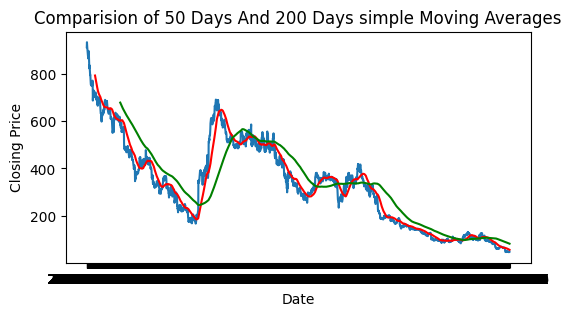

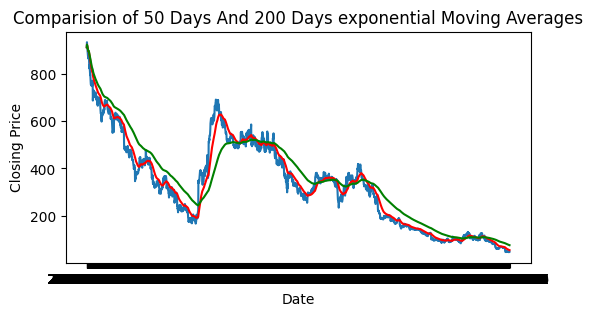

<ipython-input-6-d368a4850d2c>:39: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-6-d368a4850d2c>:39: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documenta

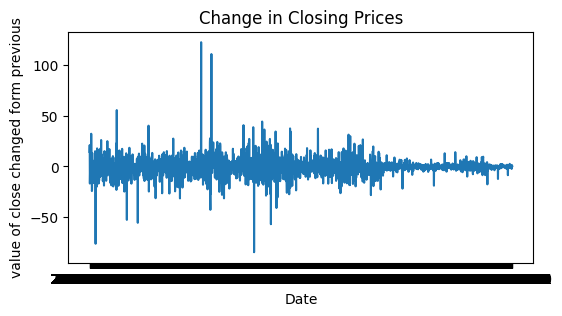

Golden Cross detected. Buying at 378.51
Death Cross detected. Selling at 512.74
Golden Cross detected. Buying at 513.97
Death Cross detected. Selling at 490.70
Golden Cross detected. Buying at 367.32
Death Cross detected. Selling at 253.67
Golden Cross detected. Buying at 348.68
Death Cross detected. Selling at 288.85
Golden Cross detected. Buying at 117.68
Death Cross detected. Selling at 92.45
buy date: DatetimeIndex(['2022-03-28', '2020-12-24', '2019-06-28', '2018-09-07',
               '2016-01-06'],
              dtype='datetime64[ns]', name='Date', freq=None)
sell date: DatetimeIndex(['2021-06-23', '2020-11-30', '2018-12-26', '2018-04-06',
               '2015-06-09'],
              dtype='datetime64[ns]', name='Date', freq=None)


<ipython-input-7-8a1bee0a3bc4>:231: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-8a1bee0a3bc4>:231: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-8a1bee0a3bc4>:231: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-8a1be

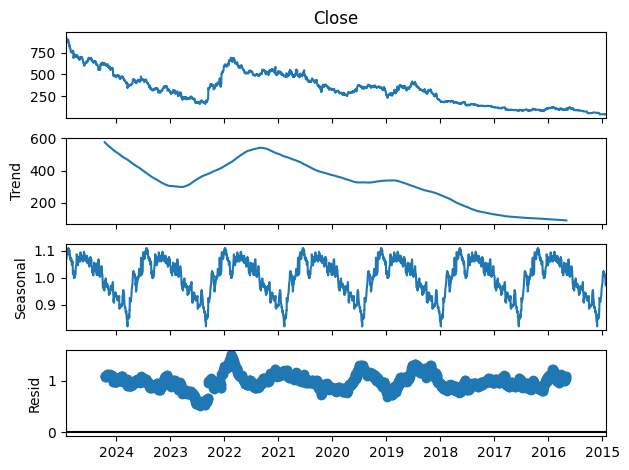

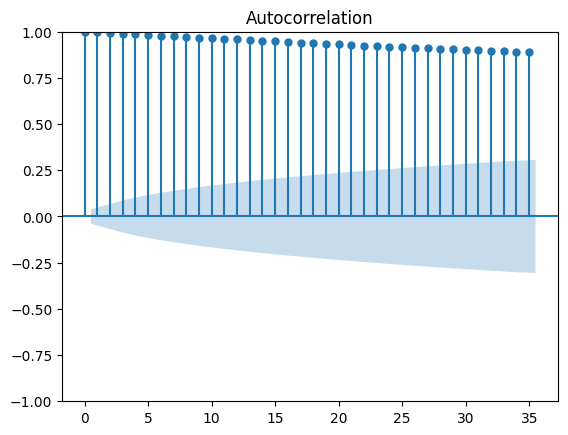

Durbin Watson Statistic: 0.007132702922155772
Augmneted Dickey_fuller Statistic: -2.043766
p-value: 0.267719
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567


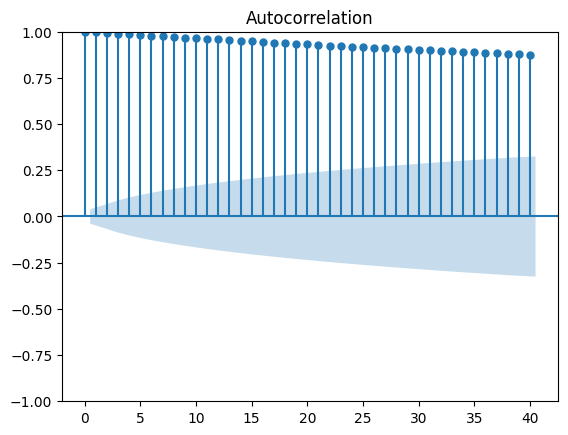

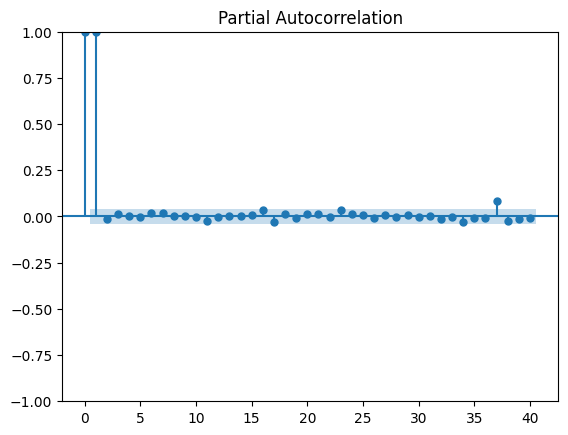

Training LSTM...
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0765 - mae: 0.2205 - val_loss: 0.0027 - val_mae: 0.0439
Epoch 2/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0041 - mae: 0.0496 - val_loss: 6.9562e-04 - val_mae: 0.0208
Epoch 3/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0038 - mae: 0.0457 - val_loss: 6.8978e-04 - val_mae: 0.0209
Epoch 4/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0034 - mae: 0.0446 - val_loss: 6.6706e-04 - val_mae: 0.0205
Epoch 5/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0032 - mae: 0.0422 - val_loss: 7.7745e-04 - val_mae: 0.0222
Epoch 6/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0030 - mae: 0.0408 - val_loss: 7.0365e-04 - val_mae: 0.0209
Epoch 7/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0032 - mae: 0.0420 - val_loss: 5.9236e-04 - val_mae: 0.0194
Epoch 8/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0029 - mae: 0.0411 - val_loss: 5.5988e-04 - val_mae: 0.0187
Epoch 9/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/s

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning:

The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.



Best parameters for DecisionTree: {'max_depth': None}
Metrics - MAE: 0.0296, RMSE: 0.0499, R²: 0.9528
Tuning hyperparameters for SVR...
Best parameters for SVR: {'kernel': 'linear', 'C': 0.1}
Metrics - MAE: 0.0381, RMSE: 0.0468, R²: 0.9584
Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
Metrics - MAE: 0.0242, RMSE: 0.0438, R²: 0.9636

Model Evaluation Metrics:
Model                MAE        RMSE       R²        
LSTM                 0.0295     0.0403     0.9693    
KNN                  0.0343     0.0525     0.9477    
CatBoost             0.0291     0.0482     0.9560    
ElasticNet           0.1886     0.2572     -0.2541   
Bayesian Ridge       0.0120     0.0185     0.9935    
AdaBoost             0.0315     0.0523     0.9482    
Ridge                0.0124     0.0189     0.9933    
Extra Trees          0.0279     0.0458     0.9602    
LinearRegression     0.0120     0.

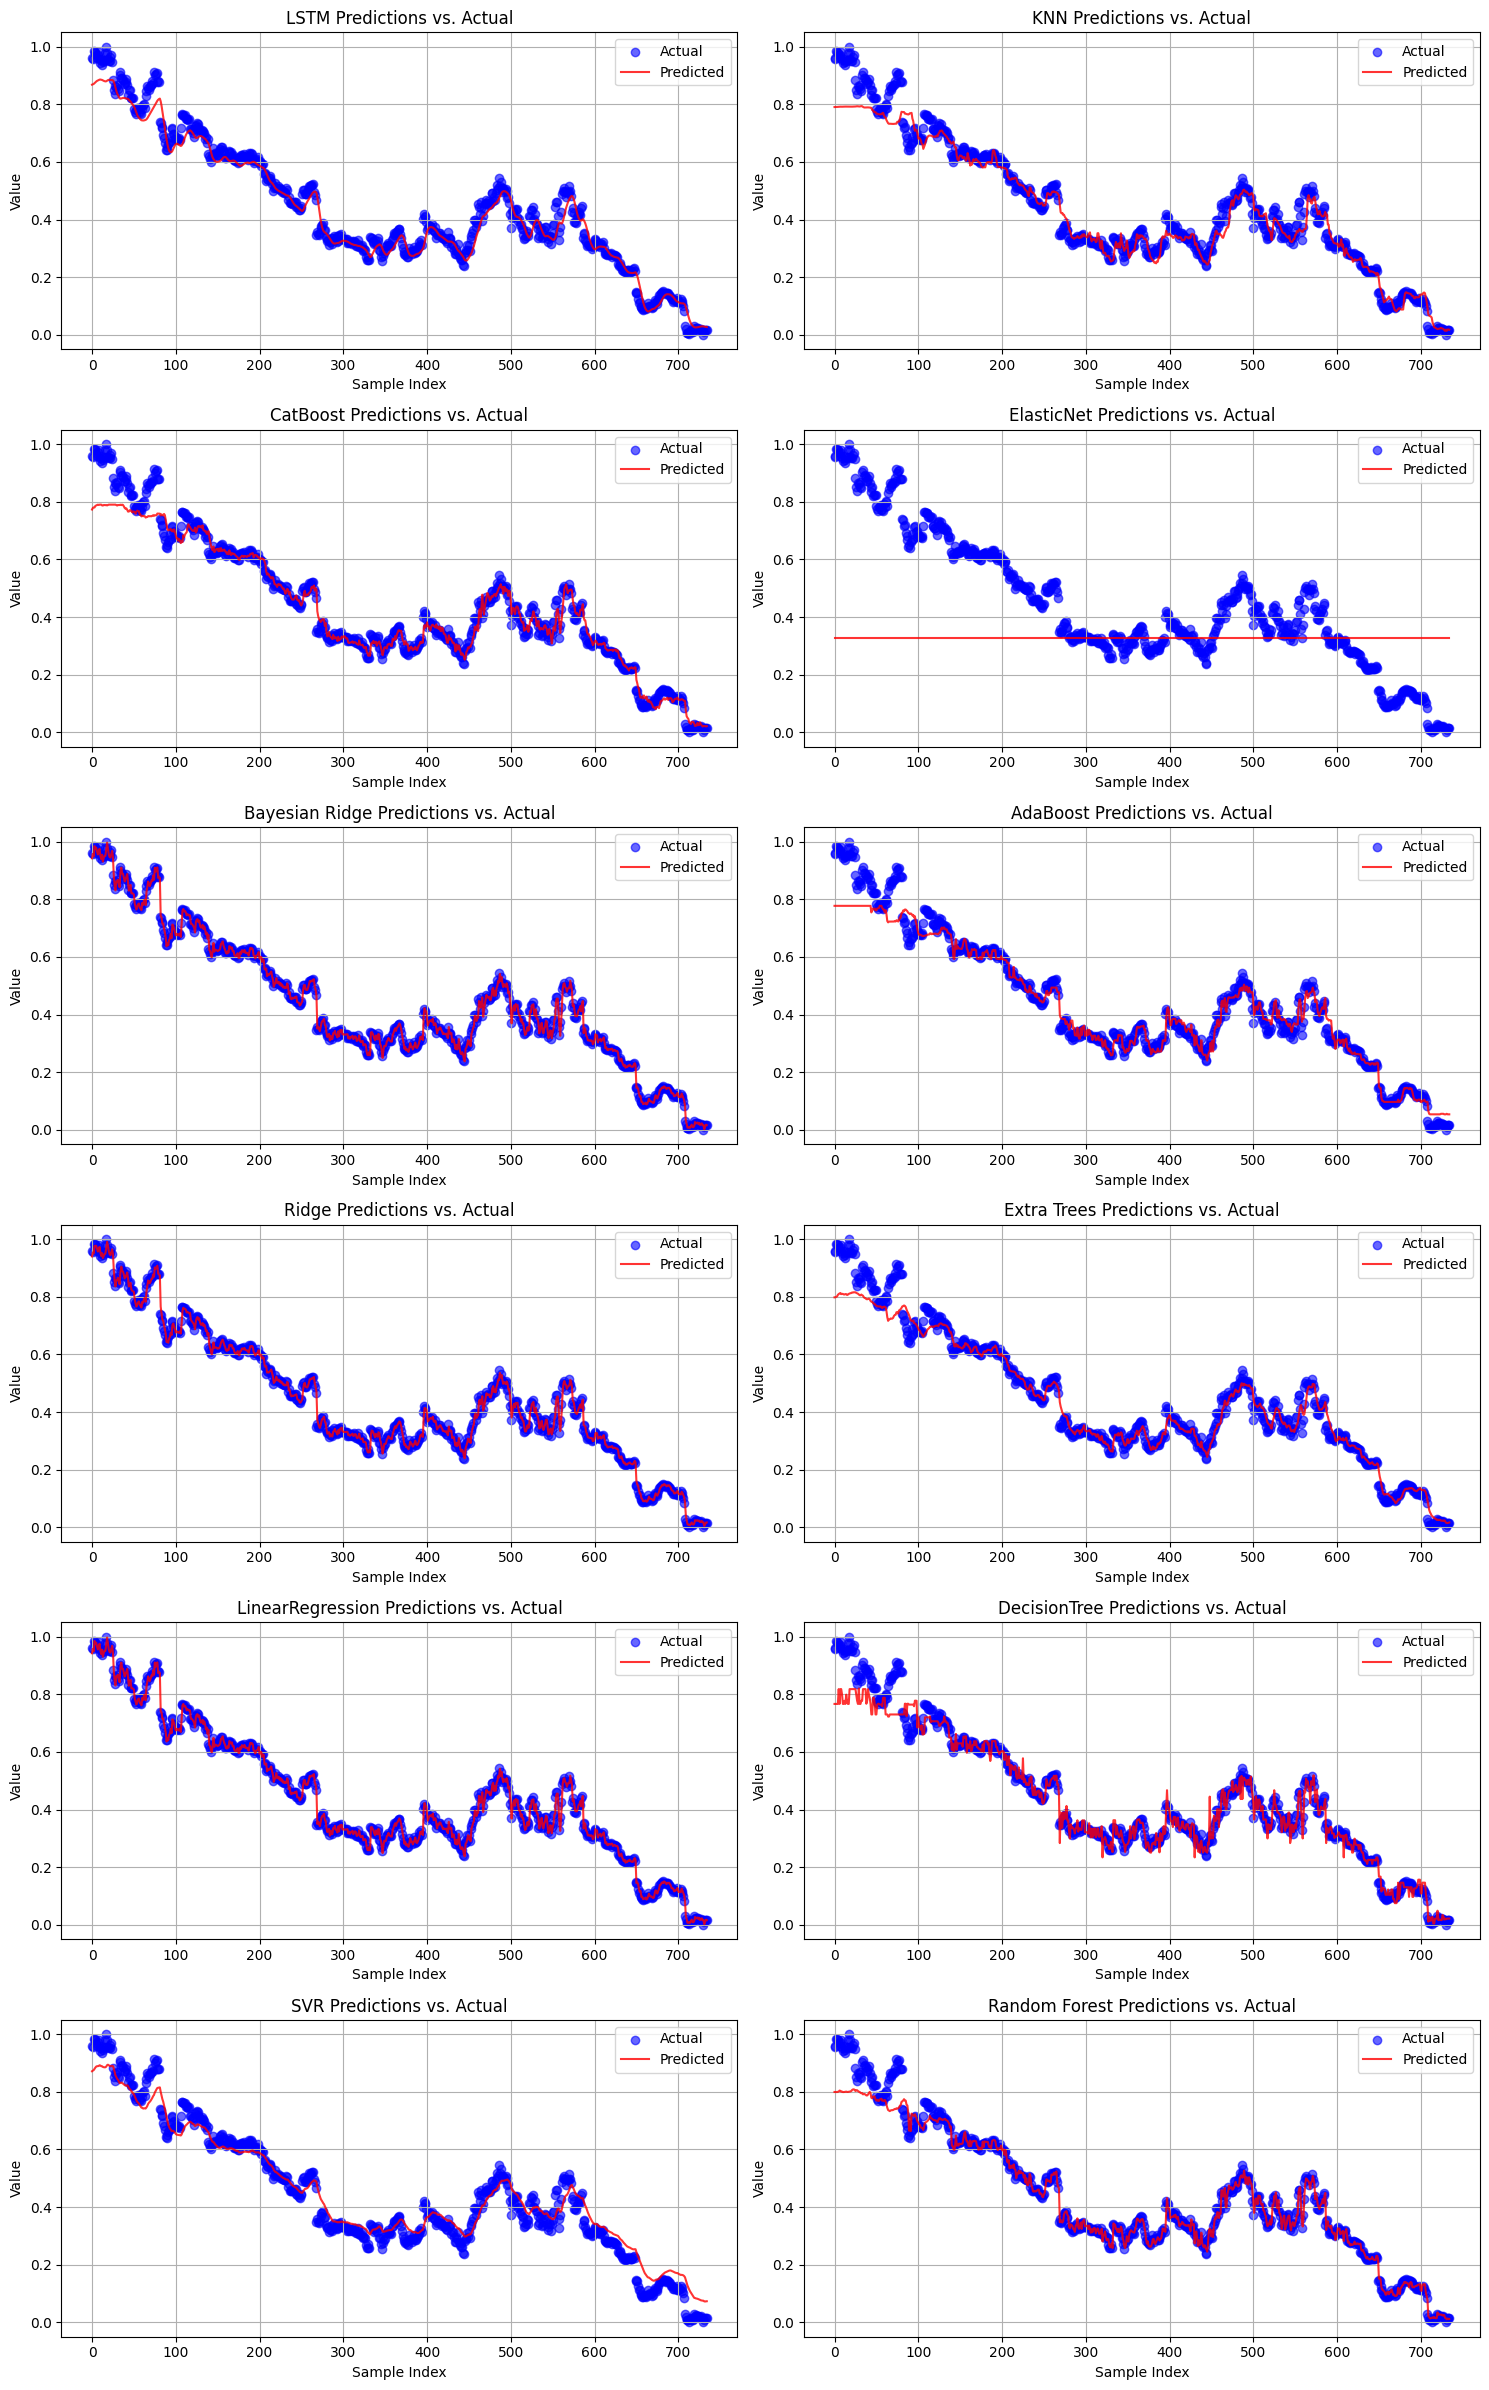

In [ ]:
 print(f"Processing file: {file_paths[2]}")
df = pd.read_csv(file_paths[2])
# Convert 'Date' column to datetime format
df['Date']=pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')

#remove '$' from column
for col in df.columns:
  if col in df.columns:
    if df[col].dtype == 'object':
      if '$' in str(df[col].iloc[0]):
        try:
          df[col] = df[col].astype(str).str.replace('$', '', regex=False)
          df[col] = pd.to_numeric(df[col], errors='coerce') #Convert to numeric, handling potential errors
        except Exception as e:
          print(f"Error converting column '{col}': {e}")



if 'Close/Last' in df.columns:
  df = df.rename(columns={'Close/Last': 'Close'})

if "TESLA" in file_paths[2].upper():
  df=df.drop('Adj Close',axis=1)


columns_to_convert=['Open', 'High', 'Low', 'Close','Volume']

df.index=df['Date']
df=df.drop('Date',axis=1)
print(df.head(1))
# Data Exploration
df = data_exploration(df, columns_to_convert)
data_visualization(df)

#key indicator visualisation
keyindicators(df)

# Data Preprocessing
X_train, y_train, X_test, y_test = preprocess_data(df)


# time series models
seasonality_test(df)
autocorrelation_test(df)
stationarity_test(df)

# Model Training and Evaluation
metrics_results, predictions = train_and_evaluate_models(X_train, X_test, y_train, y_test)

#Prediction vs Actual plot
plot_predictions_vs_actual(y_test, predictions)



# stock 4:- '/gdrive/MyDrive/STARBUCKS.csv',


Processing file: /gdrive/MyDrive/STARBUCKS.csv
            Close   Volume    Open    High     Low
Date                                              
2024-12-09  99.31  7271601  100.07  100.57  98.515
Data Shape: (2516, 5)
Data Description:
              Close        Volume         Open         High          Low
count  2516.000000  2.516000e+03  2516.000000  2516.000000  2516.000000
mean     77.552002  8.817096e+06    77.540840    78.264275    76.802628
std      20.975336  5.590058e+06    20.976871    21.161459    20.786337
min      39.564999  1.847770e+06    39.564999    40.145000    39.220001
25%      57.509998  5.981345e+06    57.427500    57.891251    56.993750
50%      76.645000  7.627192e+06    76.705002    77.549999    75.760002
75%      95.622501  1.009415e+07    95.560001    96.542501    94.780048
max     126.059998  1.572155e+08   126.080002   126.320000   124.809998
Missing Values:
 Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64
Negative values in th

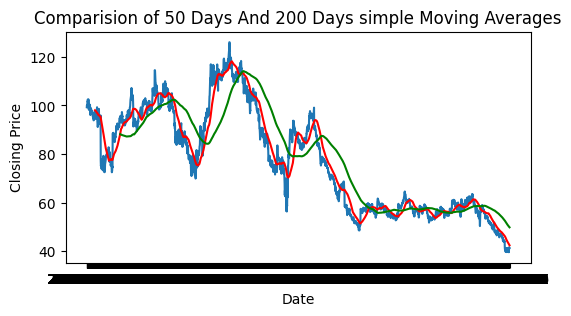

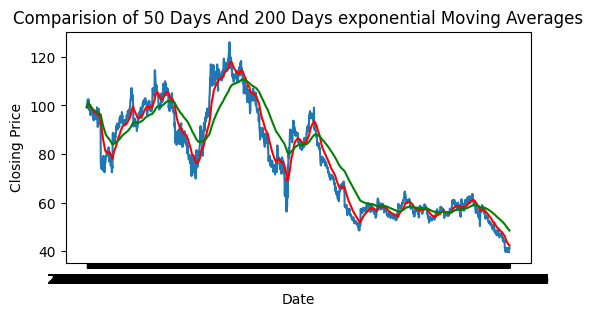

<ipython-input-6-d368a4850d2c>:39: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-6-d368a4850d2c>:39: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documenta

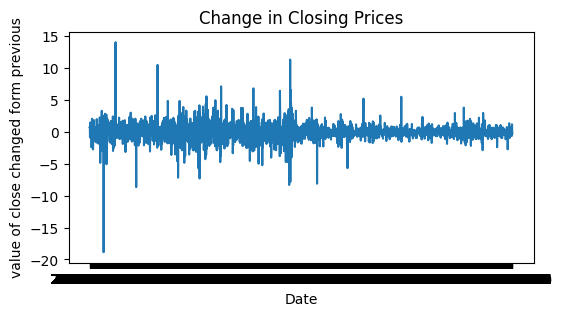

Death Cross detected. Selling at 97.07
Golden Cross detected. Buying at 93.11
Death Cross detected. Selling at 115.92
Golden Cross detected. Buying at 93.62
Death Cross detected. Selling at 75.28
Golden Cross detected. Buying at 58.00
Death Cross detected. Selling at 54.60
Golden Cross detected. Buying at 60.09
Death Cross detected. Selling at 56.11
Golden Cross detected. Buying at 56.32
Death Cross detected. Selling at 56.30
Golden Cross detected. Buying at 60.90
Death Cross detected. Selling at 53.96
buy date: DatetimeIndex(['2022-02-22', '2020-01-17', '2018-04-20', '2018-04-03',
               '2017-06-19', '2017-06-15', '2017-01-17', '2016-12-29',
               '2016-09-07', '2016-07-11', '2016-04-20', '2016-04-19',
               '2016-04-11', '2016-03-07', '2016-01-15'],
              dtype='datetime64[ns]', name='Date', freq=None)
sell date: DatetimeIndex(['2024-05-16', '2022-11-16', '2021-04-26', '2021-04-22',
               '2019-08-28', '2019-05-29', '2017-10-05', '2017-02-1

<ipython-input-7-8a1bee0a3bc4>:231: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-8a1bee0a3bc4>:231: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-8a1bee0a3bc4>:231: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-8a1be

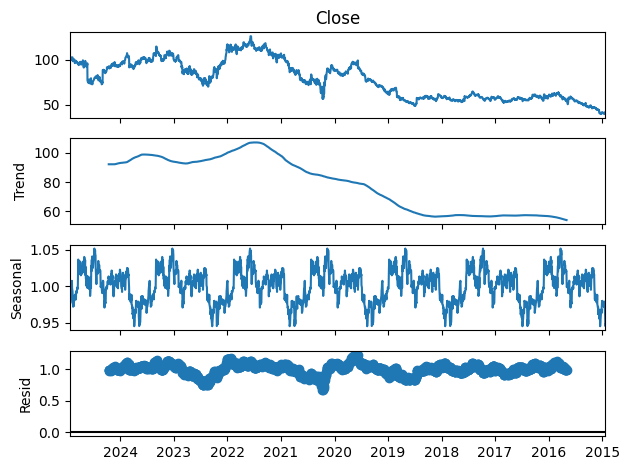

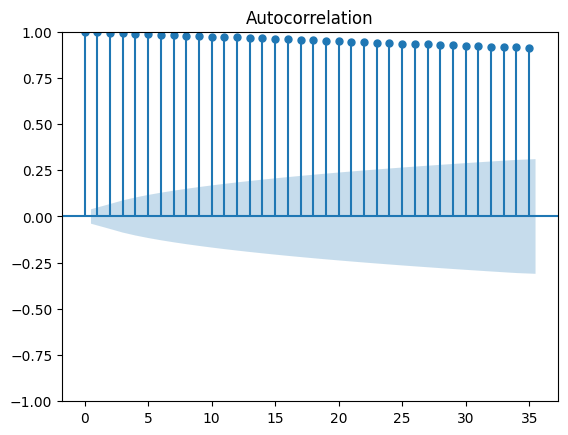

Durbin Watson Statistic: 0.01261046798767608
Augmneted Dickey_fuller Statistic: -1.128719
p-value: 0.703484
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567


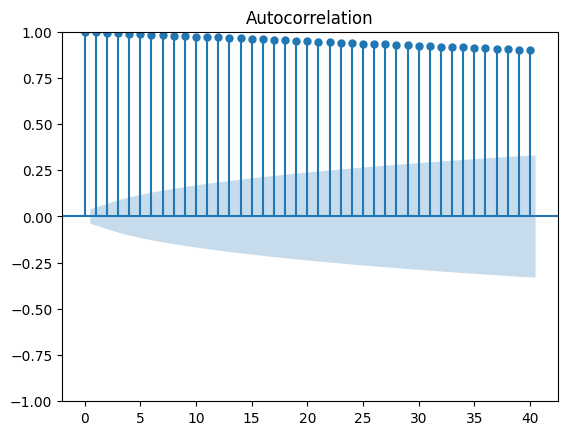

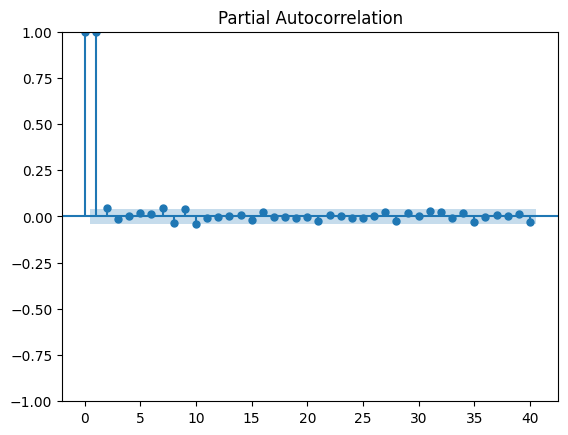

Training LSTM...
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.2003 - mae: 0.3757 - val_loss: 0.0368 - val_mae: 0.1880
Epoch 2/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0096 - mae: 0.0780 - val_loss: 0.0110 - val_mae: 0.0994
Epoch 3/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0074 - mae: 0.0669 - val_loss: 0.0045 - val_mae: 0.0605
Epoch 4/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0069 - mae: 0.0658 - val_loss: 0.0033 - val_mae: 0.0503
Epoch 5/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0065 - mae: 0.0637 - val_loss: 0.0025 - val_mae: 0.0421
Epoch 6/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0061 - mae: 0.0611 - val_loss: 0.0030 - val_mae: 0.0482
Epoch 7/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0065 - mae: 0.0627 - val_loss: 0.0046 - val_mae: 0.0620
Epoch 8/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0059 - mae: 0.0613 - val_loss: 0.0028 - val_mae: 0.0442
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Tuning hyperparameters for KNN...
B

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning:

The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.



Best parameters for DecisionTree: {'max_depth': None}
Metrics - MAE: 0.0271, RMSE: 0.0375, R²: 0.9643
Tuning hyperparameters for SVR...
Best parameters for SVR: {'kernel': 'linear', 'C': 0.1}
Metrics - MAE: 0.0323, RMSE: 0.0425, R²: 0.9542
Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
Metrics - MAE: 0.0219, RMSE: 0.0304, R²: 0.9766

Model Evaluation Metrics:
Model                MAE        RMSE       R²        
LSTM                 0.0530     0.0679     0.8832    
KNN                  0.0372     0.0489     0.9393    
CatBoost             0.0282     0.0386     0.9622    
ElasticNet           0.2029     0.2312     -0.3565   
Bayesian Ridge       0.0198     0.0283     0.9796    
AdaBoost             0.0288     0.0384     0.9625    
Ridge                0.0200     0.0286     0.9793    
Extra Trees          0.0300     0.0416     0.9561    
LinearRegression     0.0198     0.

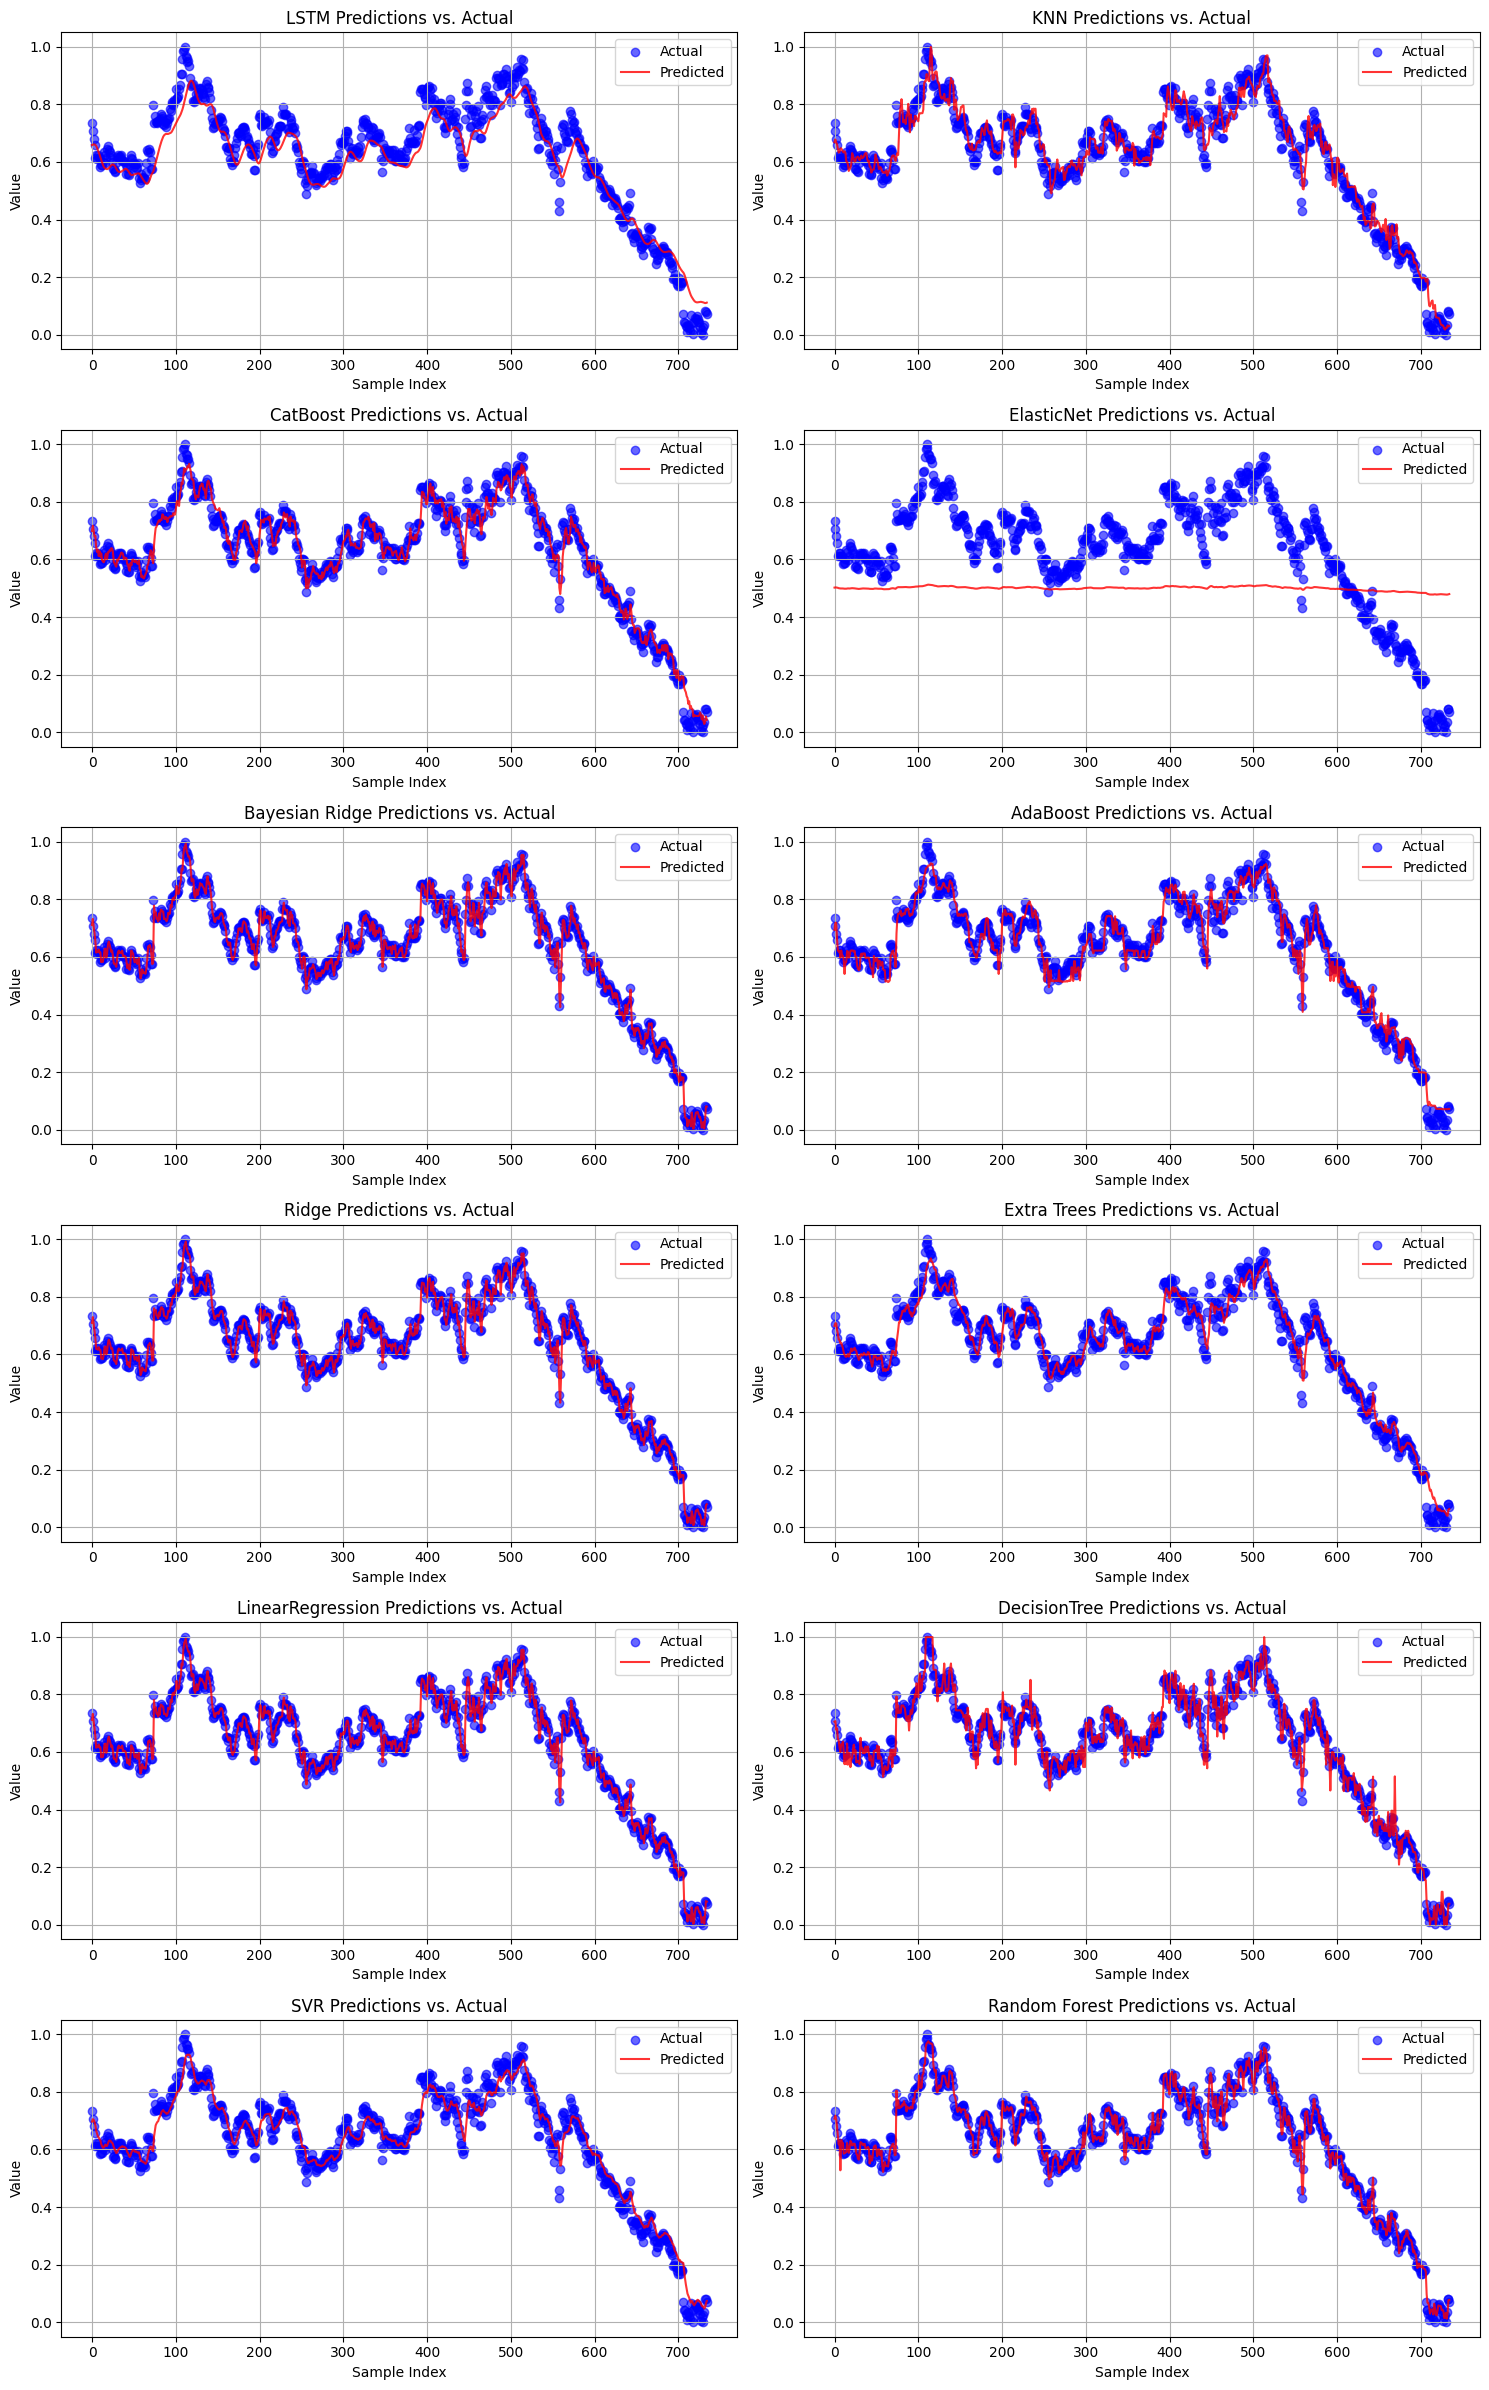

In [ ]:
print(f"Processing file: {file_paths[3]}")
df = pd.read_csv(file_paths[3])
# Convert 'Date' column to datetime format
df['Date']=pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')

#remove '$' from column
for col in df.columns:
  if col in df.columns:
    if df[col].dtype == 'object':
      if '$' in str(df[col].iloc[0]):
        try:
          df[col] = df[col].astype(str).str.replace('$', '', regex=False)
          df[col] = pd.to_numeric(df[col], errors='coerce') #Convert to numeric, handling potential errors
        except Exception as e:
          print(f"Error converting column '{col}': {e}")



if 'Close/Last' in df.columns:
  df = df.rename(columns={'Close/Last': 'Close'})

if "TESLA" in file_paths[3].upper():
  df=df.drop('Adj Close',axis=1)


columns_to_convert=['Open', 'High', 'Low', 'Close','Volume']

df.index=df['Date']
df=df.drop('Date',axis=1)
print(df.head(1))
# Data Exploration
df = data_exploration(df, columns_to_convert)
data_visualization(df)

#key indicator visualisation
keyindicators(df)

# Data Preprocessing
X_train, y_train, X_test, y_test = preprocess_data(df)

# time series models
seasonality_test(df)
autocorrelation_test(df)
stationarity_test(df)

# Model Training and Evaluation
metrics_results, predictions = train_and_evaluate_models(X_train, X_test, y_train, y_test)

#Prediction vs Actual plot
plot_predictions_vs_actual(y_test, predictions)

# stock 5:- '/gdrive/MyDrive/cisco.csv'


Processing file: /gdrive/MyDrive/cisco.csv
            Close    Volume   Open   High    Low
Date                                            
2024-12-09  58.95  16517460  59.83  59.88  58.86
Data Shape: (2516, 5)
Data Description:
              Close       Volume         Open         High          Low
count  2516.000000       2516.0  2516.000000  2516.000000  2516.000000
mean     42.915821   22069636.0    42.902153    43.282318    42.528618
std       9.853196   10151844.0     9.846733     9.926089     9.770440
min      22.510000    5720538.0    22.600000    22.860001    22.459999
25%      32.307501   16117497.5    32.215001    32.446399    32.052501
50%      45.344999   19565300.0    45.325001    45.770000    44.889999
75%      50.122499   24692405.0    50.112500    50.488750    49.736251
max      63.959999  117194000.0    64.040001    64.285004    63.549999
Missing Values:
 Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64
Negative values in the column Open are: 

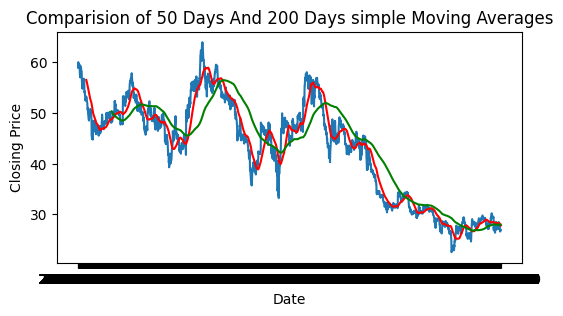

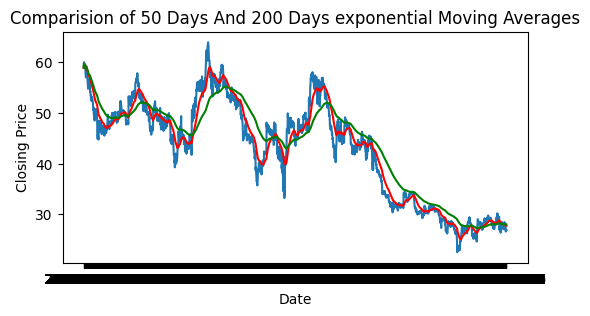

<ipython-input-6-d368a4850d2c>:39: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-6-d368a4850d2c>:39: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documenta

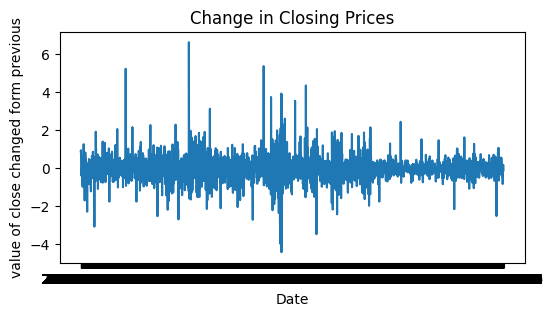

Golden Cross detected. Buying at 52.14
Death Cross detected. Selling at 49.74
Golden Cross detected. Buying at 49.31
Death Cross detected. Selling at 53.26
Golden Cross detected. Buying at 45.63
Death Cross detected. Selling at 40.58
Golden Cross detected. Buying at 49.02
Death Cross detected. Selling at 47.35
Golden Cross detected. Buying at 34.24
Death Cross detected. Selling at 30.38
Golden Cross detected. Buying at 29.35
Death Cross detected. Selling at 25.19
Golden Cross detected. Buying at 28.03
Death Cross detected. Selling at 26.85
buy date: DatetimeIndex(['2024-01-26', '2023-02-22', '2022-04-27', '2020-07-07',
               '2020-07-02', '2020-01-17', '2018-10-10', '2017-05-02',
               '2017-03-15', '2015-10-23', '2015-08-04', '2015-07-20',
               '2015-07-14', '2015-05-28', '2015-05-13'],
              dtype='datetime64[ns]', name='Date', freq=None)
sell date: DatetimeIndex(['2023-06-01', '2022-09-26', '2021-07-08', '2021-07-07',
               '2021-06-22', 

<ipython-input-7-8a1bee0a3bc4>:231: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-8a1bee0a3bc4>:231: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-8a1bee0a3bc4>:231: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-8a1be

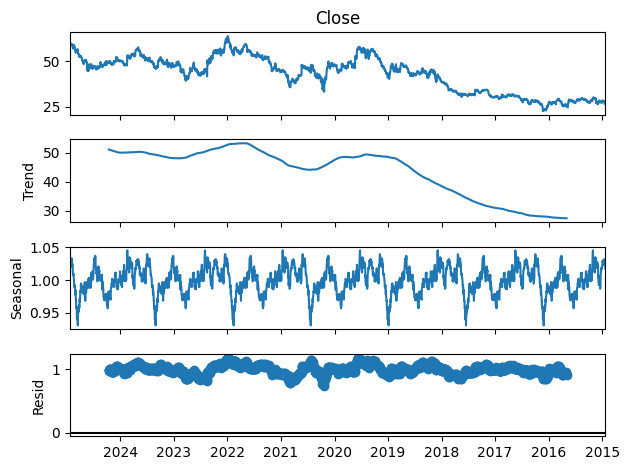

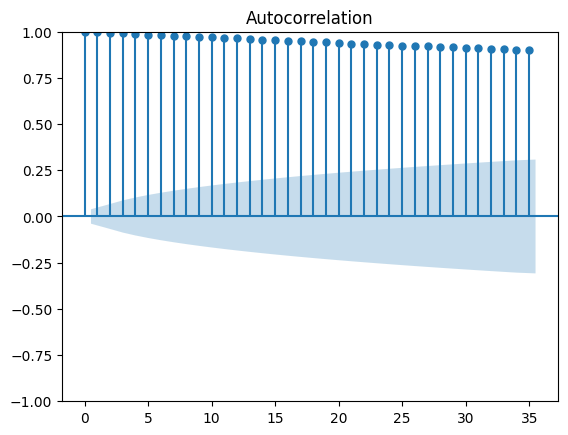

Durbin Watson Statistic: 0.013874947789270826
Augmneted Dickey_fuller Statistic: -1.612173
p-value: 0.476835
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567


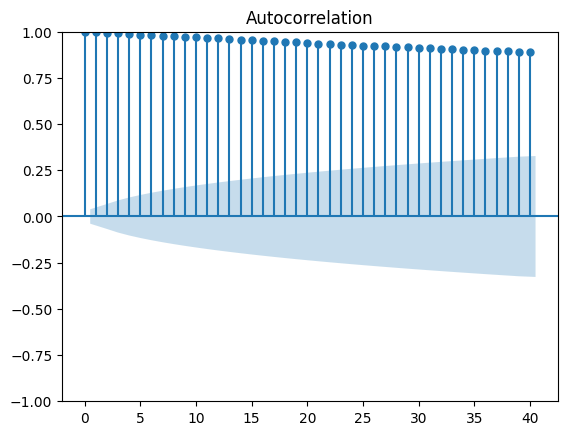

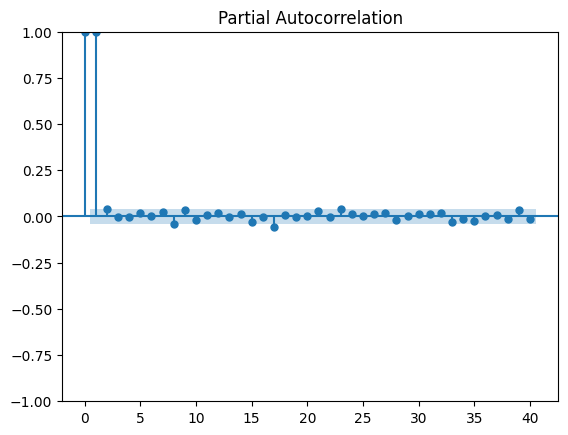

Training LSTM...
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1573 - mae: 0.3315 - val_loss: 0.0069 - val_mae: 0.0710
Epoch 2/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0093 - mae: 0.0755 - val_loss: 0.0024 - val_mae: 0.0374
Epoch 3/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0081 - mae: 0.0706 - val_loss: 0.0027 - val_mae: 0.0429
Epoch 4/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0071 - mae: 0.0657 - val_loss: 0.0022 - val_mae: 0.0358
Epoch 5/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0067 - mae: 0.0644 - val_loss: 0.0021 - val_mae: 0.0354
Epoch 6/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0063 - mae: 0.0615 - val_loss: 0.0023 - val_mae: 0.0361
Epoch 7/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0066 - mae: 0.0623 - val_loss: 0.0022 - val_mae: 0.0375
Epoch 8/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0062 - mae: 0.0619 - val_loss: 0.0018 - val_mae: 0.0328
Epoch 9/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0055 - mae: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning:

The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.



Best parameters for DecisionTree: {'max_depth': 10}
Metrics - MAE: 0.0259, RMSE: 0.0373, R²: 0.9516
Tuning hyperparameters for SVR...
Best parameters for SVR: {'kernel': 'linear', 'C': 0.1}
Metrics - MAE: 0.0285, RMSE: 0.0386, R²: 0.9480
Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 30}
Metrics - MAE: 0.0188, RMSE: 0.0270, R²: 0.9746

Model Evaluation Metrics:
Model                MAE        RMSE       R²        
LSTM                 0.0315     0.0436     0.9338    
KNN                  0.0310     0.0420     0.9385    
CatBoost             0.0227     0.0323     0.9637    
ElasticNet           0.1439     0.1729     -0.0419   
Bayesian Ridge       0.0167     0.0241     0.9797    
AdaBoost             0.0269     0.0361     0.9546    
Ridge                0.0168     0.0242     0.9795    
Extra Trees          0.0244     0.0354     0.9564    
LinearRegression     0.0167     0.02

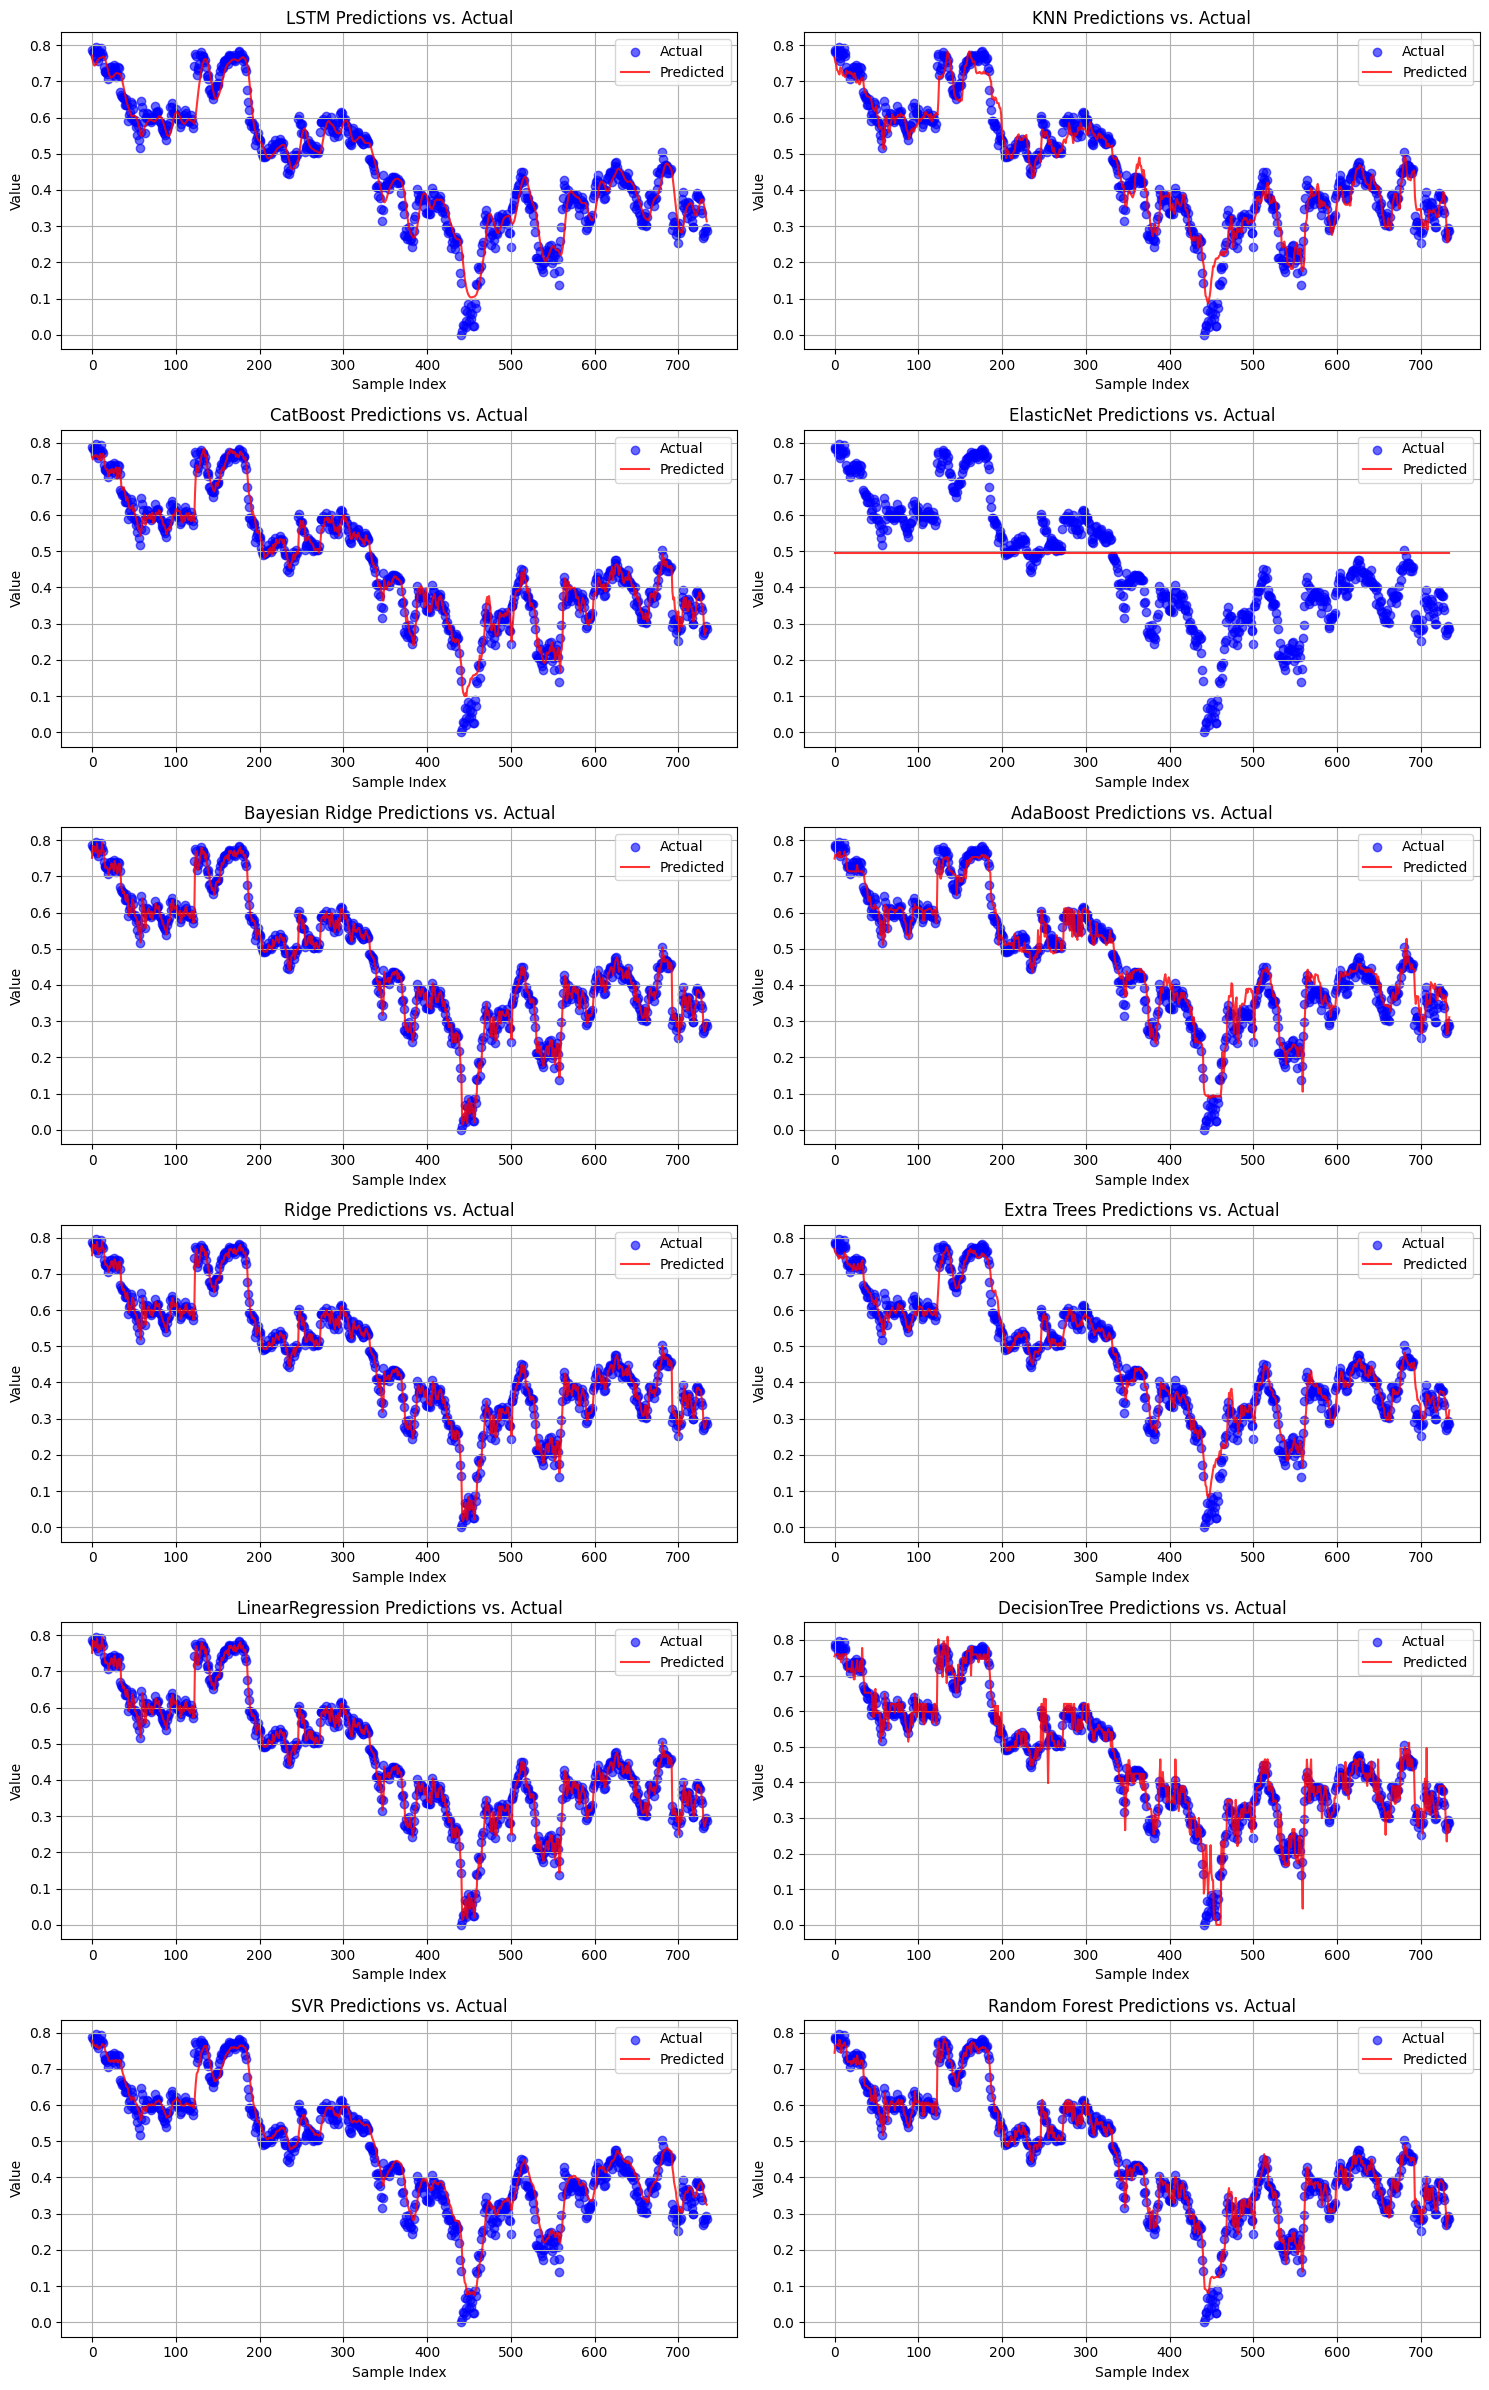

In [ ]:
print(f"Processing file: {file_paths[4]}")
df = pd.read_csv(file_paths[4])
# Convert 'Date' column to datetime format
df['Date']=pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')

#remove '$' from column
for col in df.columns:
  if col in df.columns:
    if df[col].dtype == 'object':
      if '$' in str(df[col].iloc[0]):
        try:
          df[col] = df[col].astype(str).str.replace('$', '', regex=False)
          df[col] = pd.to_numeric(df[col], errors='coerce') #Convert to numeric, handling potential errors
        except Exception as e:
          print(f"Error converting column '{col}': {e}")



if 'Close/Last' in df.columns:
  df = df.rename(columns={'Close/Last': 'Close'})

if "TESLA" in file_paths[4].upper():
  df=df.drop('Adj Close',axis=1)


columns_to_convert=['Open', 'High', 'Low', 'Close','Volume']

df.index=df['Date']
df=df.drop('Date',axis=1)
print(df.head(1))
# Data Exploration
df = data_exploration(df, columns_to_convert)
data_visualization(df)

#key indicator visualisation
keyindicators(df)

# Data Preprocessing
X_train, y_train, X_test, y_test = preprocess_data(df)

# time series models
seasonality_test(df)
autocorrelation_test(df)
stationarity_test(df)


# Model Training and Evaluation
metrics_results, predictions = train_and_evaluate_models(X_train, X_test, y_train, y_test)

#Prediction vs Actual plot
plot_predictions_vs_actual(y_test, predictions)

